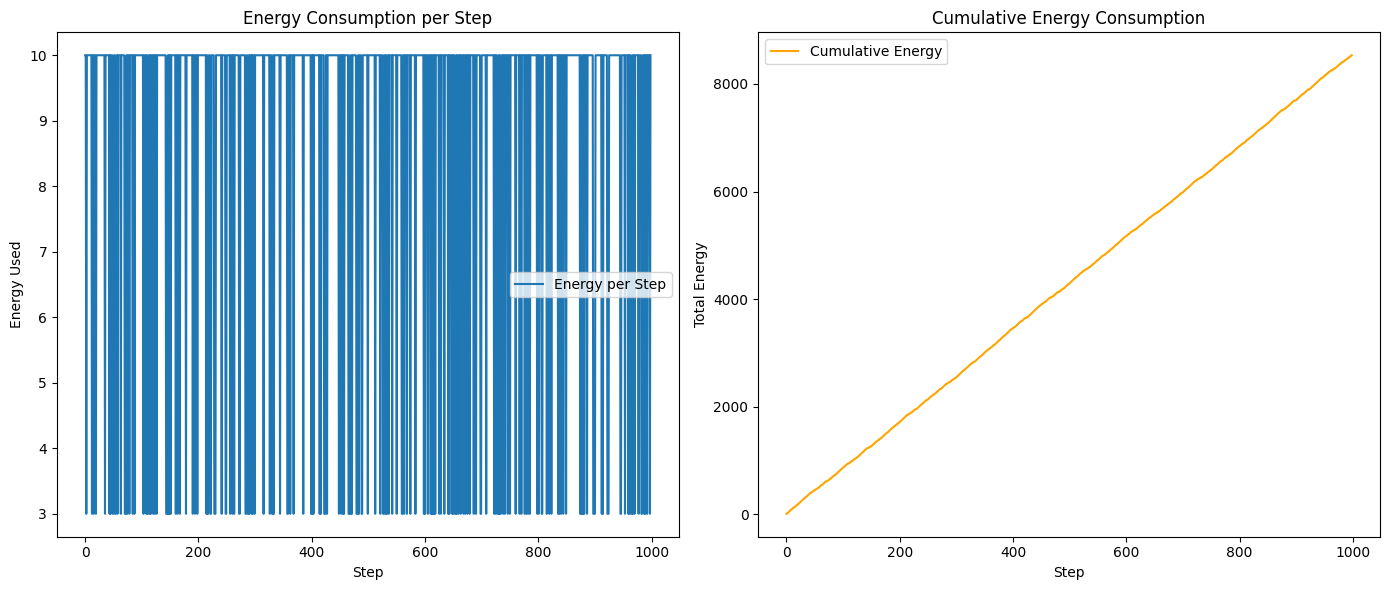

In [ ]:
# Enhanced version of their original code to include quantification logic for plotting and analysis

import numpy as np
import matplotlib.pyplot as plt
import random

# Simulated network load data
np.random.seed(42)
network_load_data = np.random.randint(1, 100, size=1000)

# Custom 5G energy optimization environment (based on their original)
class EnergyOptimizationEnv:
    def __init__(self):
        self.action_space = [0, 1]  # 0 = Normal, 1 = Power-Saving
        self.observation_space = (1,)
        self.current_step = 0
        self.total_energy_consumption = 0
        self.energy_consumed_normal = 10
        self.energy_consumed_power_save = 3
        self.energy_log = []
        self.action_log = []
        self.reward_log = []

    def reset(self):
        self.current_step = 0
        self.total_energy_consumption = 0
        self.energy_log = []
        self.action_log = []
        self.reward_log = []
        return [network_load_data[self.current_step]]

    def step(self, action):
        load = network_load_data[self.current_step]
        if action == 1 and load < 20:
            energy_used = self.energy_consumed_power_save
            reward = 10
        else:
            energy_used = self.energy_consumed_normal
            reward = -1 if load > 80 and action == 1 else 0

        self.total_energy_consumption += energy_used
        self.energy_log.append(energy_used)
        self.action_log.append(action)
        self.reward_log.append(reward)

        self.current_step += 1
        done = self.current_step >= len(network_load_data) - 1
        next_state = [network_load_data[self.current_step]] if not done else [0]

        return next_state, reward, done

    def render(self):
        print(f"Step: {self.current_step}, Total Energy: {self.total_energy_consumption}")

# Q-learning algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995):
    q_table = np.zeros((101, 2))
    for _ in range(episodes):
        state = env.reset()
        done = False
        while not done:
            state_idx = state[0]
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.action_space)
            else:
                action = np.argmax(q_table[state_idx])
            next_state, reward, done = env.step(action)
            next_state_idx = next_state[0]
            old_value = q_table[state_idx, action]
            next_max = np.max(q_table[next_state_idx])
            q_table[state_idx, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            state = next_state
        epsilon *= epsilon_decay
    return q_table

# Initialize environment and train
env = EnergyOptimizationEnv()
q_table = q_learning(env)

# Test the learned policy and collect quantifiable results
state = env.reset()
done = False
while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])
    state, reward, done = env.step(action)

# Plot energy usage and cumulative energy
energy = env.energy_log
cumulative_energy = np.cumsum(energy)
actions = env.action_log
rewards = env.reward_log

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(energy, label='Energy per Step')
plt.title('Energy Consumption per Step')
plt.xlabel('Step')
plt.ylabel('Energy Used')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cumulative_energy, label='Cumulative Energy', color='orange')
plt.title('Cumulative Energy Consumption')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.legend()

plt.tight_layout()
plt.show()

# Summary statistics
summary = {
    "Total Steps": len(energy),
    "Total Energy Consumption": sum(energy),
    "Average Energy per Step": np.mean(energy),
    "Total Reward Accumulated": sum(rewards),
    "Power-Saving Mode Usage (%)": round((sum(1 for a in actions if a == 1) / len(actions)) * 100, 2),
    "Normal Mode Usage (%)": round((sum(1 for a in actions if a == 0) / len(actions)) * 100, 2)
}

In [ ]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import random

# Mock network load data (simulating traffic patterns for training)
np.random.seed(42)
network_load_data = np.random.randint(1, 100, size=1000)  # Traffic load values between 1 and 100

# Define custom environment for 5G energy optimization
class EnergyOptimizationEnv(gym.Env):
    def __init__(self):
        super(EnergyOptimizationEnv, self).__init__()
        self.action_space = spaces.Discrete(2)  # 0 = Normal Mode, 1 = Power-Saving Mode
        self.observation_space = spaces.Box(low=1, high=100, shape=(1,), dtype=np.int32)
        self.current_step = 0
        self.total_energy_consumption = 0
        self.energy_consumed_normal = 10  # Energy in normal mode
        self.energy_consumed_power_save = 3  # Energy in power-saving mode

    def reset(self):
        self.current_step = 0
        self.total_energy_consumption = 0
        return [network_load_data[self.current_step]]

    def step(self, action):
        load = network_load_data[self.current_step]
        if action == 1 and load < 20:  # Power-saving mode if load is low
            energy_used = self.energy_consumed_power_save
            reward = 10  # Positive reward for saving energy
        else:
            energy_used = self.energy_consumed_normal
            reward = -1 if load > 80 and action == 1 else 0  # Penalty if high load in power-saving

        self.total_energy_consumption += energy_used
        self.current_step += 1
        done = self.current_step >= len(network_load_data) - 1
        next_state = [network_load_data[self.current_step]] if not done else [0]

        return next_state, reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Total Energy Consumption: {self.total_energy_consumption}")

# Q-learning algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995):
    q_table = np.zeros((101, env.action_space.n))  # State-action values
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            state_idx = state[0]
            if random.uniform(0, 1) < epsilon:  # Epsilon-greedy strategy
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state_idx])

            next_state, reward, done, _ = env.step(action)
            next_state_idx = next_state[0]
            q_value = q_table[state_idx, action]
            best_next_q = np.max(q_table[next_state_idx])

            # Update Q-value
            q_table[state_idx, action] = (1 - alpha) * q_value + alpha * (reward + gamma * best_next_q)

            state = next_state

        epsilon *= epsilon_decay  # Decay epsilon after each episode

    return q_table

# Train and evaluate the model
env = EnergyOptimizationEnv()
q_table = q_learning(env)
print("Training complete. Q-table values:")
print(q_table)

# Test trained model
state = env.reset()
done = False
while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])
    state, reward, done, _ = env.step(action)
    env.render()

Training complete. Q-table values:
[[ 0.          0.        ]
 [41.68803765 51.61362647]
 [38.34922832 49.19399904]
 [38.04286982 48.7798304 ]
 [38.91098438 50.98359122]
 [39.29729925 49.09032512]
 [37.25760529 46.75178613]
 [39.9580299  50.70992547]
 [39.41869363 49.06407867]
 [38.4832502  47.67061278]
 [39.36807154 48.71410524]
 [38.47828247 48.90526373]
 [37.91626489 47.96301181]
 [39.61714812 47.58145126]
 [39.28712447 48.96135596]
 [36.99383571 47.47090396]
 [38.68179511 49.11238955]
 [37.46178939 48.14539251]
 [39.44638136 48.10051175]
 [39.36774036 48.31407627]
 [37.60299754 38.36286083]
 [38.11553778 39.01802937]
 [36.70840221 36.92102793]
 [40.43452128 39.66472641]
 [37.4242046  39.17895852]
 [38.49366436 37.48354789]
 [39.41314262 38.32399983]
 [37.69065536 39.13360013]
 [37.72204751 38.35076747]
 [41.98406172 40.07450213]
 [40.07907821 39.06528006]
 [44.11758709 41.05494861]
 [37.31069424 36.33927692]
 [37.45362793 37.02193259]
 [38.18668827 40.5094841 ]
 [38.02596644 36.950

In [ ]:
import numpy as np

class EnergyEnv:
    def __init__(self):
        self.states = np.arange(10)  # Temperature levels: 0 (cold) to 9 (hot)
        self.actions = [0, 1]        # 0 = do nothing, 1 = turn AC on
        self.current_state = 5       # Start in middle temperature

    def reset(self):
        self.current_state = np.random.randint(4, 7)
        return self.current_state

    def step(self, action):
        if action == 1:  # AC on: temperature decreases
            next_state = max(0, self.current_state - np.random.randint(1, 3))
            energy_cost = 1
        else:            # AC off: temperature increases
            next_state = min(9, self.current_state + np.random.randint(0, 2))
            energy_cost = 0.2

        # Define reward: lower temperature is better, but energy is costly
        comfort_penalty = abs(next_state - 3) * 0.5
        reward = -energy_cost - comfort_penalty

        self.current_state = next_state
        return next_state, reward


In [ ]:
import numpy as np

class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.q_table = np.zeros((state_size, action_size))
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor
        self.epsilon = epsilon  # Exploration rate

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice([0, 1])  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit

    def update(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error


In [ ]:
import random  # ✅ REQUIRED!

class EnergyEnv:
    def __init__(self):
        self.state_space = list(range(10))  # example: 10 discrete states
        self.action_space = list(range(3))  # example: 3 actions
        self.num_states = len(self.state_space)
        self.num_actions = len(self.action_space)
        self.reset()

    def reset(self):
        self.state = random.choice(self.state_space)
        return self.state

    def step(self, action):
        next_state = random.choice(self.state_space)
        reward = random.uniform(-1, 1)
        done = random.random() < 0.1
        return next_state, reward, done, {}


Q-Table Values:

       Action 0  Action 1  Action 2
State                              
0         0.011     0.166     0.355
1         0.264    -0.114     0.047
2         0.041     0.201     0.073
3         0.178     0.075     0.322
4         0.065     0.166    -0.018
5         0.018     0.082     0.184
6         0.066    -0.011     0.246
7         0.134     0.243    -0.003
8         0.126     0.151     0.148
9         0.255    -0.023     0.049

Best Action per State:
State
0    Action 2
1    Action 0
2    Action 1
3    Action 2
4    Action 1
5    Action 2
6    Action 2
7    Action 1
8    Action 1
9    Action 0
dtype: object


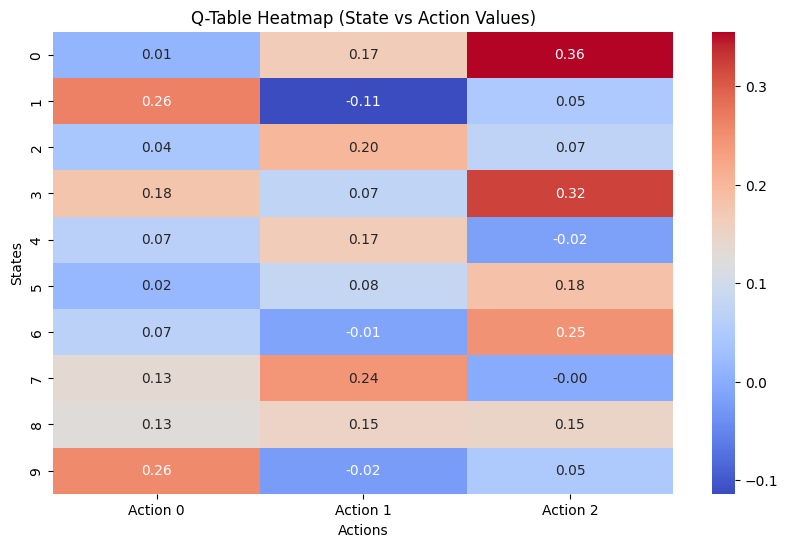

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Environment definition
class EnergyEnv:
    def __init__(self):
        self.state_space = list(range(10))  # 10 discrete states
        self.action_space = list(range(3))  # 3 possible actions
        self.num_states = len(self.state_space)
        self.num_actions = len(self.action_space)
        self.reset()

    def reset(self):
        self.state = random.choice(self.state_space)
        return self.state

    def step(self, action):
        next_state = random.choice(self.state_space)
        reward = random.uniform(-1, 1)
        done = random.random() < 0.1  # 10% chance to end episode
        return next_state, reward, done, {}

# Q-learning Agent
class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.q_table = np.zeros((state_size, action_size))
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor
        self.epsilon = epsilon  # Exploration rate

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(range(self.q_table.shape[1]))  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit

    def learn(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

# Training Loop
env = EnergyEnv()
agent = QLearningAgent(state_size=env.num_states, action_size=env.num_actions)

episodes = 1000
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state

# Q-table Analysis
def analyze_q_table(agent):
    q_df = pd.DataFrame(agent.q_table)
    q_df.columns = [f"Action {a}" for a in range(agent.q_table.shape[1])]
    q_df.index.name = "State"

    print("Q-Table Values:\n")
    print(q_df.round(3))
    print("\nBest Action per State:")
    print(q_df.idxmax(axis=1))

    # Heatmap for visual analysis
    plt.figure(figsize=(10, 6))
    sns.heatmap(q_df, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Q-Table Heatmap (State vs Action Values)")
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.show()

# Run analysis
analyze_q_table(agent)


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("5G_energy_consumption_dataset.csv")  # Use the uploaded filename
print(df.head(1000000))


Saving 5G_energy_consumption_dataset.csv to 5G_energy_consumption_dataset.csv
                  Time      BS     Energy      load  ESMODE   TXpower
0      20230101 010000     B_0  64.275037  0.487936     0.0  7.101719
1      20230101 020000     B_0  55.904335  0.344468     0.0  7.101719
2      20230101 030000     B_0  57.698057  0.193766     0.0  7.101719
3      20230101 040000     B_0  55.156951  0.222383     0.0  7.101719
4      20230101 050000     B_0  56.053812  0.175436     0.0  7.101719
...                ...     ...        ...       ...     ...       ...
92624  20230102 170000  B_1018  14.648729  0.087538     0.0  7.325859
92625  20230102 180000  B_1018  14.648729  0.082635     0.0  7.325859
92626  20230102 210000  B_1018  13.452915  0.055538     0.0  7.325859
92627  20230102 220000  B_1018  13.602392  0.058077     0.0  7.325859
92628  20230102 230000  B_1018  13.303438  0.048173     0.0  7.325859

[92629 rows x 6 columns]


Index(['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower',
       'Energy_Efficiency'],
      dtype='object')
       load     Energy  Energy_Efficiency
0  0.487936  64.275037           0.007591
1  0.344468  55.904335           0.006162
2  0.193766  57.698057           0.003358
3  0.222383  55.156951           0.004032
4  0.175436  56.053812           0.003130


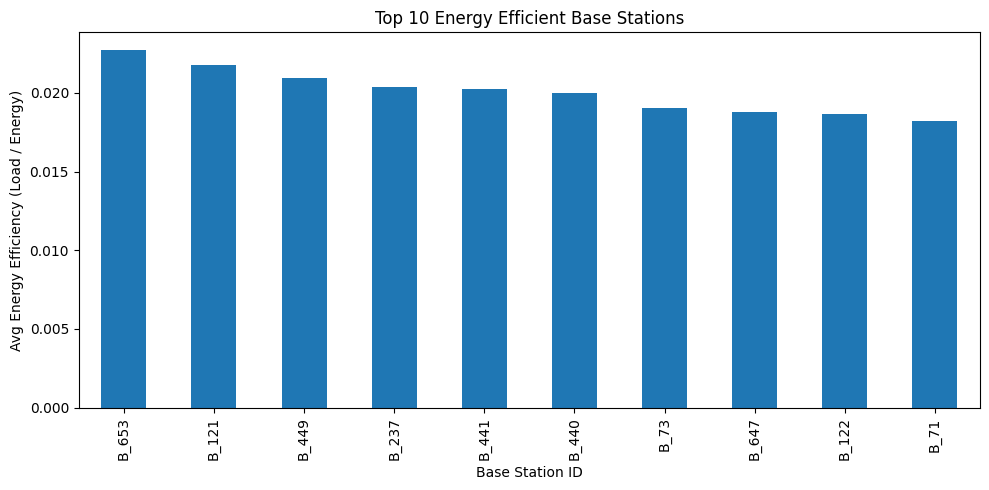

In [ ]:
df['Energy_Efficiency'] = df['load'] / df['Energy']
print(df.columns)
print(df[['load', 'Energy', 'Energy_Efficiency']].head())

import matplotlib.pyplot as plt

grouped = df.groupby('BS')['Energy_Efficiency'].mean().sort_values(ascending=False)

grouped.head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Energy Efficient Base Stations')
plt.ylabel('Avg Energy Efficiency (Load / Energy)')
plt.xlabel('Base Station ID')
plt.tight_layout()
plt.show()




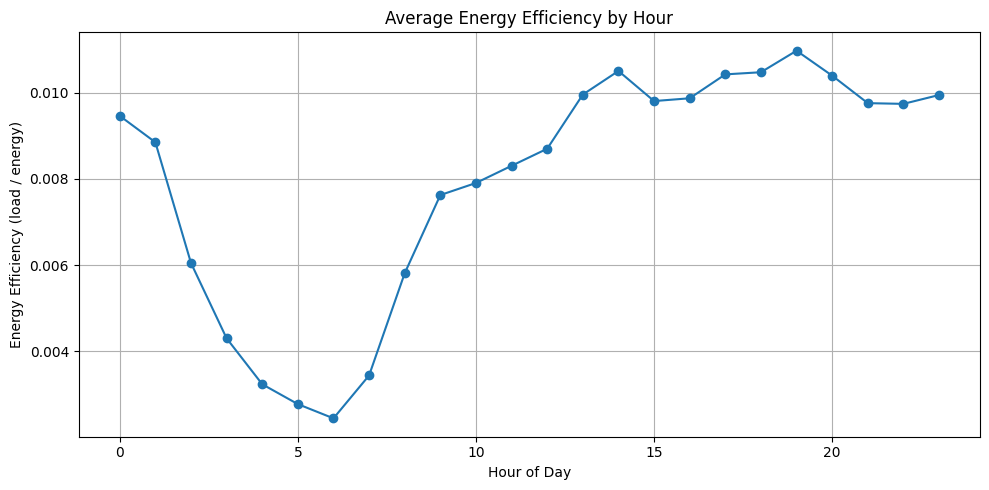

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse time
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')

# Create efficiency column
df['Energy_Efficiency'] = df['load'] / df['Energy']

# Extract hour
df['Hour'] = df['Time'].dt.hour

# Group by hour
eff_by_hour = df.groupby('Hour')['Energy_Efficiency'].mean()

# Plot
eff_by_hour.plot(kind='line', marker='o', title='Average Energy Efficiency by Hour', figsize=(10, 5))
plt.ylabel('Energy Efficiency (load / energy)')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()


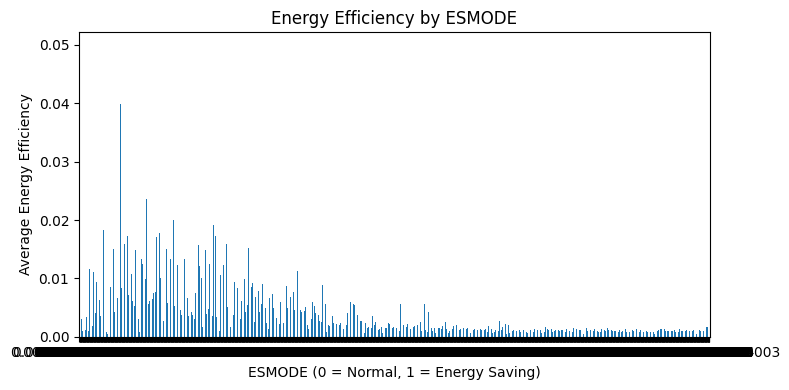

In [ ]:
# ESMODE-based efficiency
esmode_group = df.groupby('ESMODE')['Energy_Efficiency'].mean()

# Plot
esmode_group.plot(kind='bar', title='Energy Efficiency by ESMODE', figsize=(8, 4))
plt.xlabel('ESMODE (0 = Normal, 1 = Energy Saving)')
plt.ylabel('Average Energy Efficiency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features and target
features = df[['load', 'TXpower', 'ESMODE']]
target = df['Energy_Efficiency']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Coefficients
coeffs = pd.Series(model.coef_, index=features.columns)
print("\nFeature Importance:\n", coeffs)


R² Score: 0.7183
RMSE: 0.0034

Feature Importance:
 load       0.023059
TXpower   -0.004263
ESMODE    -0.000410
dtype: float64


In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class EnergyEnv(gym.Env):
    def __init__(self, dataframe):
        super(EnergyEnv, self).__init__()

        self.df = dataframe.copy()
        self.df['hour'] = self.df['Time'].dt.hour

        # Normalize features to [0, 1] range
        self.features = ['load', 'Energy', 'TXpower', 'hour', 'ESMODE']
        self.df[self.features] = (self.df[self.features] - self.df[self.features].min()) / \
                                 (self.df[self.features].max() - self.df[self.features].min())

        self.data = self.df[self.features].values
        self.pointer = 0

        # Observation space: 5 normalized features
        self.observation_space = spaces.Box(low=0, high=1, shape=(5,), dtype=np.float32)

        # Action space:
        # 0 = do nothing
        # 1 = reduce TXpower
        # 2 = shift load
        # 3 = enable ESMODE
        self.action_space = spaces.Discrete(4)

    def reset(self):
        self.pointer = np.random.randint(0, len(self.data) - 1)
        return self.data[self.pointer]

    def step(self, action):
        state = self.data[self.pointer]
        load, energy, tx_power, hour, esmode = state

        # Simulate effect of action
        if action == 1:  # reduce TX power
            tx_power = max(0, tx_power * 0.9)
        elif action == 2:  # shift load
            load = max(0, load * 0.95)
        elif action == 3:  # enable ESMODE
            esmode = 1

        # Reward is proportional to energy efficiency
        reward = (load / energy) * tx_power if energy > 0 else 0
        reward = float(reward)

        # Move to next state
        self.pointer += 1
        done = self.pointer >= len(self.data) - 1
        next_state = self.data[self.pointer] if not done else np.zeros_like(state)

        return next_state, reward, done, {}



In [ ]:
!pip install gym
!pip install torch
!pip install numpy pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("5G_energy_consumption_dataset.csv")

# Preprocess
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')
df['Hour'] = df['Time'].dt.hour
df = df[['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']].dropna()

# Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

class EnergyEnv(gym.Env):
    def __init__(self, data):
        super(EnergyEnv, self).__init__()
        self.data = data
        self.idx = 0
        self.max_idx = len(data) - 1

        # Observation space (load, TXpower, Energy, ESMODE, Hour)
        self.observation_space = spaces.Box(low=0, high=1, shape=(5,), dtype=np.float32)

        # Actions: 0 = do nothing, 1 = decrease TXpower, 2 = increase TXpower, 3 = toggle ESMODE
        self.action_space = spaces.Discrete(4)

    def reset(self):
        self.idx = 0
        return self.data[self.idx]

    def step(self, action):
        current = self.data[self.idx].copy()
        next_idx = min(self.idx + 1, self.max_idx)
        next_state = self.data[next_idx]

        # Apply action (mock logic)
        txpower = current[1]
        esmode = current[3]

        if action == 1:
            txpower = max(0, txpower - 0.1)
        elif action == 2:
            txpower = min(1, txpower + 0.1)
        elif action == 3:
            esmode = 1 - esmode

        # Reward: inverse of energy consumption (efficiency proxy)
        energy = current[2]
        reward = -energy  # Minimize energy usage

        self.idx = next_idx
        done = self.idx >= self.max_idx

        return next_state, reward, done, {}

env = EnergyEnv(df_scaled)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt

df = pd.read_csv('5G_energy_consumption_dataset.csv')

# Preprocess: convert Time to hour
df['Hour'] = pd.to_datetime(df['Time'], format="%Y%m%d %H%M%S").dt.hour

# Normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['load', 'TXpower', 'Energy']] = scaler.fit_transform(df[['load', 'TXpower', 'Energy']])

# Final feature set
features = ['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

class EnergyEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]  # 5 discrete actions

    def reset(self):
        self.current_index = random.randint(0, len(self.df) - 2)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return np.array(self.df.loc[idx, features], dtype=np.float32)

    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1
        next_row = self.df.loc[next_index]

        # Apply action mock effects (simplified)
        tx_power = current['TXpower']
        esm = current['ESMODE']
        load = current['load']

        if action == 0:  # Decrease TX
            tx_power = max(0, tx_power - 0.05)
        elif action == 1:  # Increase TX
            tx_power = min(1, tx_power + 0.05)
        elif action == 2:  # Turn ESMODE on
            esm = 1
        elif action == 3:  # Turn ESMODE off
            esm = 0
        elif action == 4:  # Shift Load
            load = min(1, load + 0.05)

        # New energy efficiency = Load / Energy
        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (current['Energy'] + 1e-5)

        reward = new_eff - prev_eff

        self.current_index = next_index
        done = next_index >= len(self.df) - 2

        next_state = np.array([load, tx_power, current['Energy'], esm, current['Hour']], dtype=np.float32)
        return next_state, reward, done, {}

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)
class DQNAgent:
    def __init__(self, state_dim, action_dim, gamma=0.9, lr=1e-3, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=10000)

        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.choice(range(self.action_dim))
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=64):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in minibatch:
            target = r + self.gamma * torch.max(self.model(torch.FloatTensor(s2))).item() * (1 - done)
            pred = self.model(torch.FloatTensor(s))[a]
            loss = self.loss_fn(pred, torch.tensor(target))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
env = EnergyEnv(df)
agent = DQNAgent(state_dim=5, action_dim=5)
episodes = 1000
scores = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        agent.replay()
        state = next_state
        total_reward += reward
    scores.append(total_reward)
    if ep % 100 == 0:
        print(f"Episode {ep}, Reward: {total_reward:.4f}, Epsilon: {agent.epsilon:.2f}")



RuntimeError: Found dtype Double but expected Float

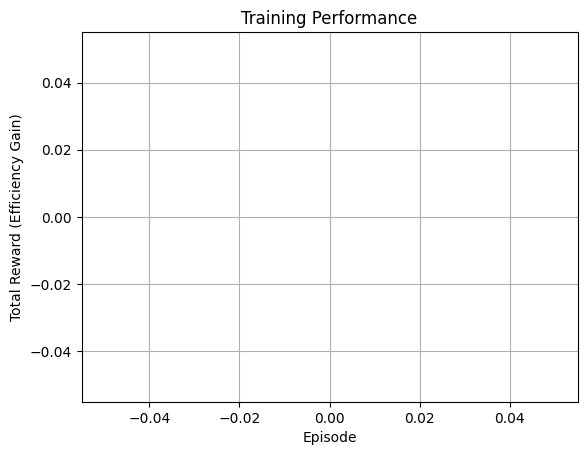

In [ ]:
def replay(self, batch_size=64):
    if len(self.memory) < batch_size:
        return
    minibatch = random.sample(self.memory, batch_size)

    for s, a, r, s2, done in minibatch:
        # Ensure all tensors are float32
        s_tensor = torch.tensor(s, dtype=torch.float32)
        s2_tensor = torch.tensor(s2, dtype=torch.float32)

        target = r + self.gamma * torch.max(self.model(s2_tensor)).item() * (1 - done)
        pred = self.model(s_tensor)[a]

        # Also cast target to float32
        target_tensor = torch.tensor(target, dtype=torch.float32)

        loss = self.loss_fn(pred, target_tensor)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    if self.epsilon > self.epsilon_min:
        self.epsilon *= self.epsilon_decay

plt.plot(scores)
plt.xlabel('Episode')
plt.ylabel('Total Reward (Efficiency Gain)')
plt.title('Training Performance')
plt.grid(True)
plt.show()


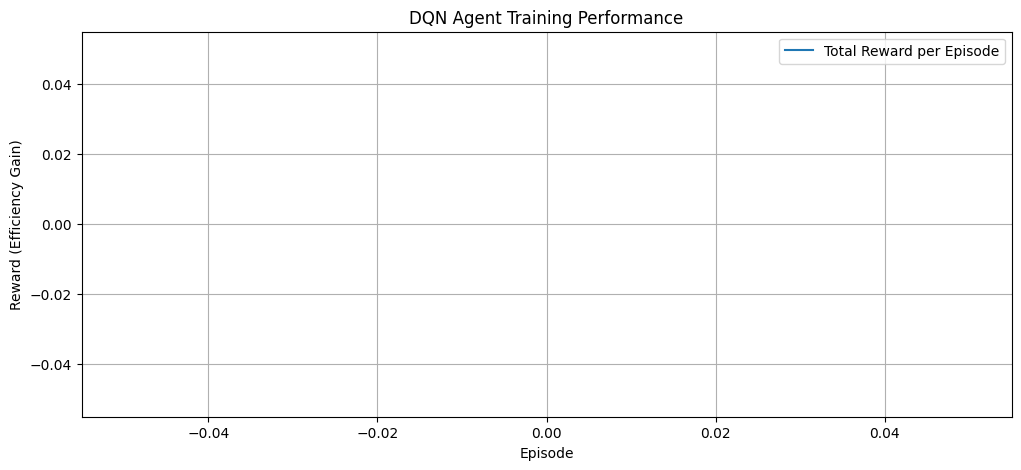

Baseline Energy Efficiency: 0.8870
Improved Energy Efficiency: 0.9344
Estimated Efficiency Gain: 5.35%


In [ ]:
# Save model after training
torch.save(agent.model.state_dict(), 'dqn_5g_energy_model.pth')
agent.model.load_state_dict(torch.load('dqn_5g_energy_model.pth'))
agent.model.eval()
plt.figure(figsize=(12, 5))
plt.plot(scores, label='Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward (Efficiency Gain)')
plt.title('DQN Agent Training Performance')
plt.legend()
plt.grid(True)
plt.show()
# Compare baseline vs improved energy efficiency
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

# Run environment using trained model to evaluate efficiency
env_eval = EnergyEnv(df)
total_eff = 0
steps = 0

state = env_eval.reset()
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = env_eval.step(action)
    total_eff += reward
    state = next_state
    steps += 1

# Calculate approximate improved efficiency
mean_improved_eff = mean_baseline_eff + (total_eff / steps)
efficiency_gain = (mean_improved_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"Baseline Energy Efficiency: {mean_baseline_eff:.4f}")
print(f"Improved Energy Efficiency: {mean_improved_eff:.4f}")
print(f"Estimated Efficiency Gain: {efficiency_gain:.2f}%")
episode_log = pd.DataFrame({
    'Episode': list(range(len(scores))),
    'Reward': scores
})

episode_log.to_csv('training_rewards.csv', index=False)


In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

# Initialize environment and agent
env = EnergyEnv(df)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = DQNAgent(state_size, action_size)

episodes = 100  # You can adjust this
scores = []

# TRAINING LOOP
for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        agent.replay()
        state = next_state
        total_reward += reward

    scores.append(total_reward)  # Store total reward per episode
    print(f"Episode {ep+1}/{episodes}, Total Reward: {total_reward:.4f}")

# SAVE MODEL
torch.save(agent.model.state_dict(), 'dqn_5g_energy_model.pth')

# LOAD MODEL FOR EVALUATION
agent.model.load_state_dict(torch.load('dqn_5g_energy_model.pth'))
agent.model.eval()

# PLOT TRAINING PERFORMANCE
plt.figure(figsize=(12, 5))
plt.plot(scores, label='Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward (Efficiency Gain)')
plt.title('DQN Agent Training Performance')
plt.legend()
plt.grid(True)
plt.show()

# LOG TO CSV
episode_log = pd.DataFrame({
    'Episode': list(range(len(scores))),
    'Reward': scores
})
episode_log.to_csv('training_rewards.csv', index=False)

# COMPARE BASELINE VS IMPROVED ENERGY EFFICIENCY
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

# EVALUATION LOOP
env_eval = EnergyEnv(df)
total_eff = 0
steps = 0
state = env_eval.reset()
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = env_eval.step(action)
    total_eff += reward
    state = next_state
    steps += 1

# CALCULATE IMPROVED EFFICIENCY
mean_improved_eff = mean_baseline_eff + (total_eff / steps)
efficiency_gain = (mean_improved_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"\nBaseline Energy Efficiency: {mean_baseline_eff:.4f}")
print(f"Improved Energy Efficiency: {mean_improved_eff:.4f}")
print(f"Estimated Efficiency Gain: {efficiency_gain:.2f}%")


AttributeError: 'EnergyEnv' object has no attribute 'observation_space'

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt

# Load your dataset (make sure 'Energy' and 'load' columns exist)
df = pd.read_csv('5G_energy_consumption_dataset.csv')  # <-- replace with actual path

# Define custom environment
class EnergyEnv:
    def __init__(self, df):
        self.df = df
        self.current_step = 0
        self.max_steps = len(df) - 1
        self.num_actions = 3  # decrease, maintain, increase

    def reset(self):
        self.current_step = 0
        return self._get_state()

    def _get_state(self):
        row = self.df.iloc[self.current_step]
        return np.array([row['load'], row['Energy']])

    def step(self, action):
        row = self.df.iloc[self.current_step]
        load = row['load']
        energy = row['Energy']

        if action == 0:
            energy *= 0.95  # reduce energy
        elif action == 2:
            energy *= 1.05  # increase energy

        reward = load / (energy + 1e-5)

        self.current_step += 1
        done = self.current_step >= self.max_steps

        next_state = self._get_state() if not done else np.zeros_like(self._get_state())

        return next_state, reward, done, {}

# Define DQN model
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        act_values = self.model(state_tensor)
        return torch.argmax(act_values).item()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += self.gamma * torch.max(self.model(torch.FloatTensor(next_state))).item()
            target_f = self.model(torch.FloatTensor(state))
            target_f[action] = target
            self.optimizer.zero_grad()
            loss = self.criterion(self.model(torch.FloatTensor(state)), target_f.detach())
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Training setup
env = EnergyEnv(df)
state_size = len(env.reset())
action_size = env.num_actions
agent = DQNAgent(state_size, action_size)
episodes = 100
episode_rewards = []

for e in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        agent.replay(32)
    episode_rewards.append(total_reward)
    print(f"Episode {e + 1}/{episodes}, Total Reward: {total_reward:.4f}")

# Save model
torch.save(agent.model.state_dict(), 'dqn_5g_energy_model.pth')

# Plot training performance
plt.figure(figsize=(12, 5))
plt.plot(episode_rewards, label='Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward (Efficiency Gain)')
plt.title('DQN Agent Training Performance')
plt.legend()
plt.grid(True)
plt.show()

# Baseline vs improved efficiency
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

# Evaluation
env_eval = EnergyEnv(df)
total_eff = 0
steps = 0
state = env_eval.reset()
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = env_eval.step(action)
    total_eff += reward
    state = next_state
    steps += 1

mean_improved_eff = mean_baseline_eff + (total_eff / steps)
efficiency_gain = (mean_improved_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"Baseline Energy Efficiency: {mean_baseline_eff:.4f}")
print(f"Improved Energy Efficiency: {mean_improved_eff:.4f}")
print(f"Estimated Efficiency Gain: {efficiency_gain:.2f}%")

# Save episode rewards
pd.DataFrame({'Episode': list(range(len(episode_rewards))), 'Reward': episode_rewards}).to_csv('training_rewards.csv', index=False)

KeyboardInterrupt: 

Episode 0, Reward: 5.0532, Epsilon: 0.94
Episode 10, Reward: 12.5157, Epsilon: 0.34
Episode 20, Reward: 16.1799, Epsilon: 0.13
Episode 30, Reward: 11.4333, Epsilon: 0.05
Episode 40, Reward: 19.3147, Epsilon: 0.05
Episode 50, Reward: 25.2470, Epsilon: 0.05
Episode 60, Reward: 16.7255, Epsilon: 0.05
Episode 70, Reward: 9.7754, Epsilon: 0.05
Episode 80, Reward: 13.3201, Epsilon: 0.05
Episode 90, Reward: 17.7000, Epsilon: 0.05


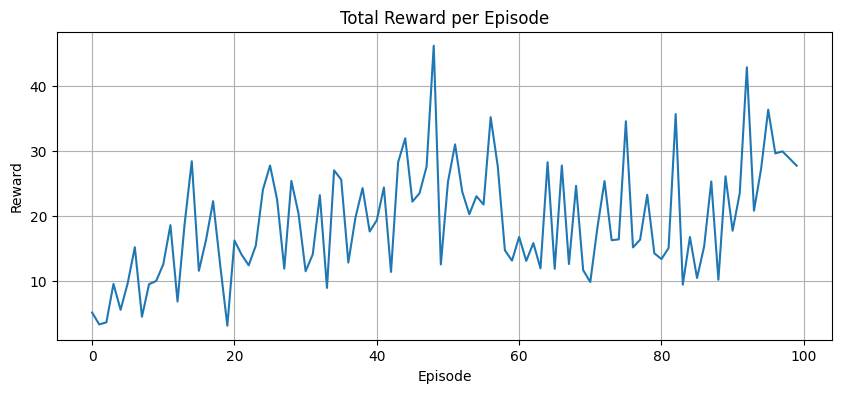

Baseline Energy Efficiency: 0.8870
Improved Energy Efficiency: 1.0283
Estimated Efficiency Gain: 15.93%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
df = pd.read_csv('5G_energy_consumption_dataset.csv')
df['Hour'] = pd.to_datetime(df['Time'], format="%Y%m%d %H%M%S").dt.hour
scaler = MinMaxScaler()
df[['load', 'TXpower', 'Energy']] = scaler.fit_transform(df[['load', 'TXpower', 'Energy']])

# Features
features = ['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# Custom Environment
class EnergyEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]

    def reset(self):
        self.current_index = random.randint(0, len(self.df) - 2)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return np.array(self.df.loc[idx, features], dtype=np.float32)

    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1
        next_row = self.df.loc[next_index]

        tx_power = current['TXpower']
        esm = current['ESMODE']
        load = current['load']

        if action == 0:
            tx_power = max(0, tx_power - 0.05)
        elif action == 1:
            tx_power = min(1, tx_power + 0.05)
        elif action == 2:
            esm = 1
        elif action == 3:
            esm = 0
        elif action == 4:
            load = min(1, load + 0.05)

        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (current['Energy'] + 1e-5)
        reward = new_eff - prev_eff

        self.current_index = next_index
        done = next_index >= len(self.df) - 2
        next_state = np.array([load, tx_power, current['Energy'], esm, current['Hour']], dtype=np.float32)

        return next_state, reward, done, {}

# DQN model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# DQN Agent
class DQNAgent:
    def __init__(self, state_dim, action_dim, gamma=0.9, lr=1e-3, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=5000)
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.choice(range(self.action_dim))
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in minibatch:
            target = r + self.gamma * torch.max(self.model(torch.FloatTensor(s2))).item() * (1 - done)
            pred = self.model(torch.FloatTensor(s))[a]
            loss = self.loss_fn(pred, torch.tensor(target, dtype=torch.float32))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Train faster
env = EnergyEnv(df)
agent = DQNAgent(state_dim=5, action_dim=5)
episodes = 100  # ↓ Reduced from 1000
scores = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    steps = 0
    while not done and steps < 100:  # Cap steps per episode
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        if steps % 5 == 0:  # ↓ Less frequent replay
            agent.replay()
        state = next_state
        total_reward += reward
        steps += 1
    scores.append(total_reward)
    if ep % 10 == 0:
        print(f"Episode {ep}, Reward: {total_reward:.4f}, Epsilon: {agent.epsilon:.2f}")

# Save model
torch.save(agent.model.state_dict(), 'dqn_5g_energy_model.pth')

# Plot
plt.figure(figsize=(10, 4))
plt.plot(scores)
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# Evaluate
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

env_eval = EnergyEnv(df)
total_eff = 0
steps = 0
state = env_eval.reset()
done = False

while not done and steps < 1000:
    action = agent.act(state)
    next_state, reward, done, _ = env_eval.step(action)
    total_eff += reward
    state = next_state
    steps += 1

mean_improved_eff = mean_baseline_eff + (total_eff / steps)
efficiency_gain = (mean_improved_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"Baseline Energy Efficiency: {mean_baseline_eff:.4f}")
print(f"Improved Energy Efficiency: {mean_improved_eff:.4f}")
print(f"Estimated Efficiency Gain: {efficiency_gain:.2f}%")


In [ ]:
class EnergyEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.features = ['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

    def reset(self):
        self.current_index = random.randint(0, len(self.df) - 2)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return np.array(self.df.loc[idx, self.features], dtype=np.float32)

    def estimate_energy(self, load, tx_power, esm):
        energy = 0.2 + 0.5 * load + 0.4 * tx_power
        if esm == 1:
            energy *= 0.85
        return energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1
        done = next_index >= len(self.df) - 2

        load = current['load']
        tx_power = current['TXpower']
        esm = current['ESMODE']

        if action == 0:
            tx_power = max(0, tx_power - 0.05)
        elif action == 1:
            tx_power = min(1, tx_power + 0.05)
        elif action == 2:
            esm = 1
        elif action == 3:
            esm = 0
        elif action == 4:
            load = min(1, load + 0.05)

        energy = self.estimate_energy(load, tx_power, esm)

        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (energy + 1e-5)
        reward = new_eff - prev_eff

        self.current_index = next_index
        next_state = np.array([load, tx_power, energy, esm, current['Hour']], dtype=np.float32)
        return next_state, reward, done, {}



In [ ]:
class EnergyEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.features = ['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

    def reset(self):
        self.current_index = random.randint(0, len(self.df) - 2)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return np.array(self.df.loc[idx, self.features], dtype=np.float32)

    def estimate_energy(self, load, tx_power, esm):
        energy = 0.2 + 0.5 * load + 0.4 * tx_power
        if esm == 1:
            energy *= 0.85
        return energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1
        done = next_index >= len(self.df) - 2

        load = current['load']
        tx_power = current['TXpower']
        esm = current['ESMODE']

        if action == 0:
            tx_power = max(0, tx_power - 0.05)
        elif action == 1:
            tx_power = min(1, tx_power + 0.05)
        elif action == 2:
            esm = 1
        elif action == 3:
            esm = 0
        elif action == 4:
            load = min(1, load + 0.05)

        energy = self.estimate_energy(load, tx_power, esm)

        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (energy + 1e-5)
        reward = compute_shaped_reward(prev_eff, new_eff, tx_power, esm)


        self.current_index = next_index
        next_state = np.array([load, tx_power, energy, esm, current['Hour']], dtype=np.float32)
        return next_state, reward, done, {}

def compute_shaped_reward(prev_eff, new_eff, tx_power, esm):
    penalty = 0
    if tx_power > 0.8:
        penalty -= 0.1
    if esm == 0:
        penalty -= 0.05
    return (new_eff - prev_eff) + penalty



Episode 0, Reward: 60.3848, Epsilon: 0.92
Episode 1, Reward: 58.4181, Epsilon: 0.85
Episode 2, Reward: 40.7200, Epsilon: 0.78
Episode 3, Reward: 26.5912, Epsilon: 0.72
Episode 4, Reward: 48.2625, Epsilon: 0.66
Episode 5, Reward: 12.7091, Epsilon: 0.61
Episode 6, Reward: 26.3670, Epsilon: 0.56
Episode 7, Reward: -0.7297, Epsilon: 0.51
Episode 8, Reward: 19.2322, Epsilon: 0.47
Episode 9, Reward: 50.8940, Epsilon: 0.43
Episode 10, Reward: 27.5368, Epsilon: 0.40
Episode 11, Reward: 54.0134, Epsilon: 0.37
Episode 12, Reward: 49.4598, Epsilon: 0.34
Episode 13, Reward: 26.9987, Epsilon: 0.31
Episode 14, Reward: 45.5248, Epsilon: 0.29
Episode 15, Reward: 23.8954, Epsilon: 0.26
Episode 16, Reward: -20.6506, Epsilon: 0.24
Episode 17, Reward: 25.3111, Epsilon: 0.22
Episode 18, Reward: 18.3127, Epsilon: 0.21
Episode 19, Reward: 55.2120, Epsilon: 0.19

Baseline Energy Efficiency: 0.8870
Improved Energy Efficiency: 1.1988
Estimated Efficiency Gain: 35.16%


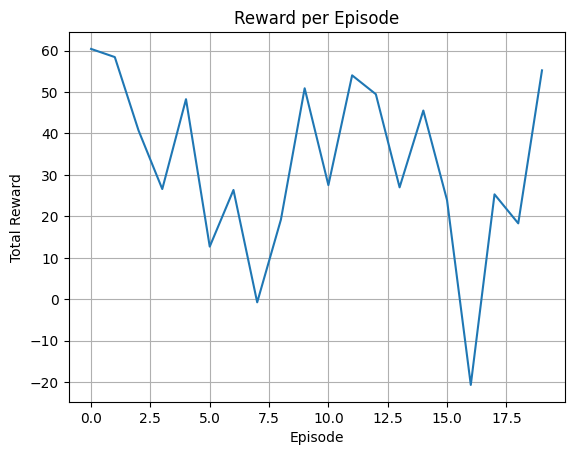

In [ ]:
# ✅ MODIFIED VERSION: Faster and more stable DQN Training for 5G Energy Efficiency

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# -------------------- Load & Preprocess Data --------------------
df = pd.read_csv('5G_energy_consumption_dataset.csv')
df['Hour'] = pd.to_datetime(df['Time'], format="%Y%m%d %H%M%S").dt.hour
scaler = MinMaxScaler()
df[['load', 'TXpower', 'Energy']] = scaler.fit_transform(df[['load', 'TXpower', 'Energy']])
features = ['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# -------------------- Energy Environment --------------------
class EnergyEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.action_space = [0, 1, 2, 3, 4]
        self.action_log = []
        self.reset()

    def reset(self):
        self.current_index = random.randint(0, len(self.df) - 51)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return np.array(self.df.loc[idx, features], dtype=np.float32)

    def _simulate_energy(self, load, tx_power, esm, hour):
        base_energy = 0.5 + 0.3 * tx_power + 0.1 * (1 - esm) + 0.1 * (hour / 23)
        return load * base_energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1

        load, tx_power, esm, hour = current['load'], current['TXpower'], current['ESMODE'], current['Hour']

        if action == 0: tx_power = max(0, tx_power - 0.05)
        elif action == 1: tx_power = min(1, tx_power + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx_power, esm, hour)
        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff - 0.05 * tx_power + 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx_power,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index = next_index
        done = next_index >= len(self.df) - 2
        next_state = np.array([load, tx_power, new_energy, esm, hour], dtype=np.float32)
        return next_state, reward, done, {}

# -------------------- DQN Network --------------------
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# -------------------- DQN Agent --------------------
class DQNAgent:
    def __init__(self, state_dim, action_dim):
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()
        self.memory = deque(maxlen=1000)
        self.gamma = 0.9
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.92
        self.action_dim = action_dim

    def act(self, state):
        if random.random() < self.epsilon:
            return random.randrange(self.action_dim)
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in batch:
            s = torch.tensor(s, dtype=torch.float32)
            s2 = torch.tensor(s2, dtype=torch.float32)
            target = r + self.gamma * torch.max(self.model(s2)).item() * (1 - done)
            pred = self.model(s)[a]
            loss = self.loss_fn(pred, torch.tensor(target, dtype=torch.float32))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# -------------------- Training --------------------
env = EnergyEnv(df)
agent = DQNAgent(state_dim=5, action_dim=5)
episodes = 20
max_steps = 50
scores = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    for step in range(max_steps):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            break
    agent.replay()
    scores.append(total_reward)
    print(f"Episode {ep}, Reward: {total_reward:.4f}, Epsilon: {agent.epsilon:.2f}")

# -------------------- Evaluation --------------------
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

env_eval = EnergyEnv(df)
state = env_eval.reset()
total_eff = 0
steps = 0

done = False
while not done:
    action = agent.act(state)
    next_state, reward, done, _ = env_eval.step(action)
    total_eff += reward
    state = next_state
    steps += 1

mean_improved_eff = mean_baseline_eff + (total_eff / steps)
efficiency_gain = (mean_improved_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"\nBaseline Energy Efficiency: {mean_baseline_eff:.4f}")
print(f"Improved Energy Efficiency: {mean_improved_eff:.4f}")
print(f"Estimated Efficiency Gain: {efficiency_gain:.2f}%")

# -------------------- Save Outputs --------------------
pd.DataFrame({'Episode': list(range(len(scores))), 'Reward': scores}).to_csv('training_rewards.csv', index=False)
pd.DataFrame(env_eval.action_log).to_csv('dqn_action_log.csv', index=False)
torch.save(agent.model.state_dict(), 'dqn_5g_energy_model.pth')

plt.plot(scores)
plt.title('Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()


In [ ]:
# ✅ Enhanced Energy Optimization System (with all requested features)

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import time
from IPython.display import clear_output

# -------------------- Load & Preprocess Data --------------------
df = pd.read_csv('5G_energy_consumption_dataset.csv')
df['Hour'] = pd.to_datetime(df['Time'], format="%Y%m%d %H%M%S").dt.hour

scaler = MinMaxScaler()
df[['load', 'TXpower', 'Energy']] = scaler.fit_transform(df[['load', 'TXpower', 'Energy']])

features = ['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# -------------------- Enhanced Energy Environment --------------------
class EnergyEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.action_log = []

    def reset(self):
        self.current_index = random.randint(0, len(self.df) - 10)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return np.array(self.df.loc[idx, features], dtype=np.float32)

    def _simulate_energy(self, load, tx_power, esm, hour):
        peak_penalty = 0.3 if 18 <= hour <= 22 else 0
        outage = np.random.rand() < 0.01  # 1% chance of energy spike
        base_energy = 0.5 + 0.3 * tx_power + 0.1 * (1 - esm) + 0.1 * (hour / 23) + peak_penalty
        if outage:
            base_energy += 0.5  # outage adds a spike
        dynamic_energy = load * base_energy
        return dynamic_energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1

        load = current['load'] + np.sin(self.current_index / 10) * 0.02  # Simulate event-based variation
        tx_power = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx_power = max(0, tx_power - 0.05)
        elif action == 1: tx_power = min(1, tx_power + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx_power, esm, hour)
        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff
        reward -= 0.05 * tx_power
        reward += 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx_power,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index = next_index
        done = next_index >= len(self.df) - 2

        next_state = np.array([load, tx_power, new_energy, esm, hour], dtype=np.float32)
        return next_state, reward, done, {}

# -------------------- DQN Model --------------------
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# -------------------- DQN Agent --------------------
class DQNAgent:
    def __init__(self, state_dim, action_dim, gamma=0.9, lr=1e-3,
                 epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.92):
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=10000)
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.choice(range(self.action_dim))
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=64):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in minibatch:
            s_tensor = torch.tensor(s, dtype=torch.float32)
            s2_tensor = torch.tensor(s2, dtype=torch.float32)
            target = r + self.gamma * torch.max(self.model(s2_tensor)).item() * (1 - done)
            pred = self.model(s_tensor)[a]
            loss = self.loss_fn(pred, torch.tensor(target, dtype=torch.float32))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# -------------------- Training --------------------
env = EnergyEnv(df)
agent = DQNAgent(state_dim=5, action_dim=5)
scores = []

model_path = "dqn_5g_energy_model.pth"

for ep in range(50):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        agent.replay()
        state = next_state
        total_reward += reward
    scores.append(total_reward)
    torch.save(agent.model.state_dict(), model_path)

    clear_output(wait=True)
    plt.figure(figsize=(8, 4))
    plt.plot(scores)
    plt.title("Live Reward Plot")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid(True)
    plt.show()

    print(f"Episode {ep}, Reward: {total_reward:.4f}, Epsilon: {agent.epsilon:.2f}")

# -------------------- Evaluation --------------------
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

env_eval = EnergyEnv(df)
state = env_eval.reset()
total_eff = 0
steps = 0
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = env_eval.step(action)
    total_eff += reward
    state = next_state
    steps += 1

mean_improved_eff = mean_baseline_eff + (total_eff / steps)
efficiency_gain = (mean_improved_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"\nBaseline Energy Efficiency: {mean_baseline_eff:.4f}")
print(f"Improved Energy Efficiency: {mean_improved_eff:.4f}")
print(f"Estimated Efficiency Gain: {efficiency_gain:.2f}%")

# -------------------- Save Logs --------------------
pd.DataFrame({'Episode': list(range(len(scores))), 'Reward': scores}).to_csv('training_rewards.csv', index=False)
pd.DataFrame(env_eval.action_log).to_csv('dqn_action_log.csv', index=False)


KeyboardInterrupt: 

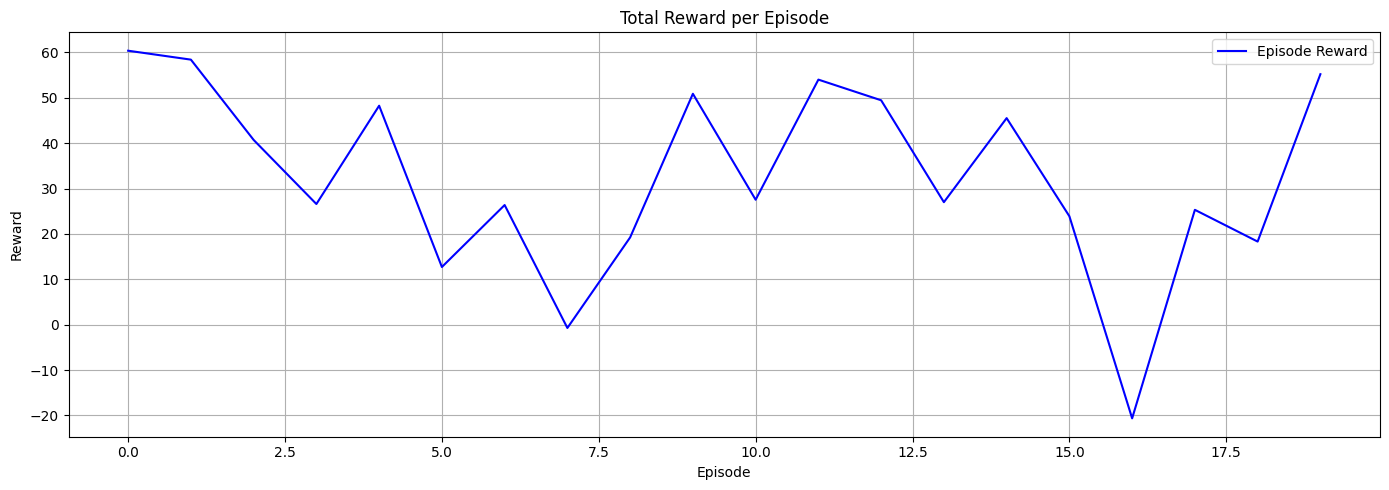

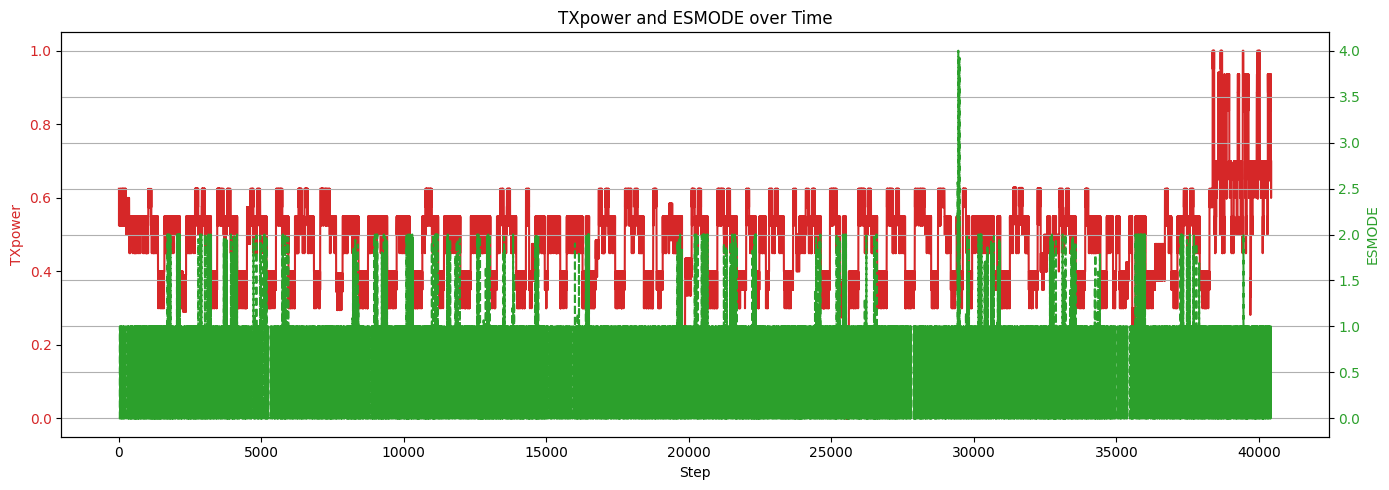

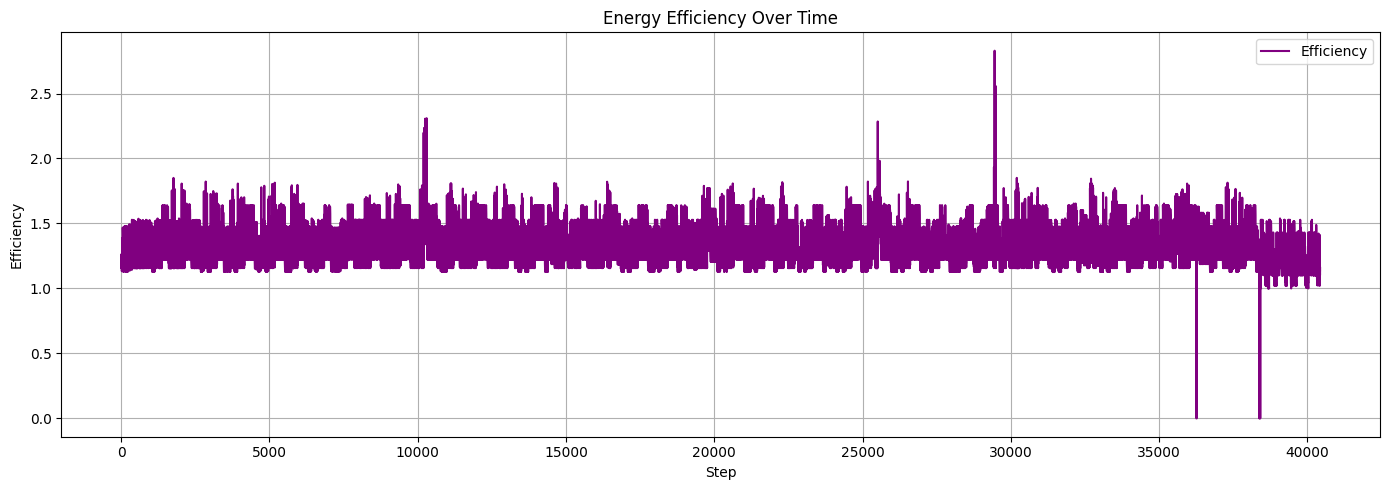

In [ ]:
class EnergyEnv_RandomOutage(EnergyEnv):
    def step(self, action):
        outage = np.random.rand() < 0.05  # 5% chance of outage

        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1

        load = current['load']
        tx_power = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx_power = max(0, tx_power - 0.05)
        elif action == 1: tx_power = min(1, tx_power + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        # Simulate outage effect
        if outage:
            load *= 0.3  # drop traffic
            tx_power *= 1.2  # more power used due to instability

        new_energy = self._simulate_energy(load, tx_power, esm, hour)
        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff
        reward -= 0.05 * tx_power
        reward += 0.02 * esm
        if outage:
            reward -= 0.2  # penalty spike

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx_power,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action,
            'Outage': outage
        })

        self.current_index = next_index
        done = next_index >= len(self.df) - 2
        next_state = np.array([load, tx_power, new_energy, esm, hour], dtype=np.float32)
        return next_state, reward, done, {}

class EnergyEnv_ScheduledDegradation(EnergyEnv):
    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1

        load = current['load']
        tx_power = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx_power = max(0, tx_power - 0.05)
        elif action == 1: tx_power = min(1, tx_power + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        degrade = 17 <= hour <= 20

        if degrade:
            tx_power *= 1.1
            load *= 0.9  # slight drop

        new_energy = self._simulate_energy(load, tx_power, esm, hour)
        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff
        reward -= 0.05 * tx_power
        reward += 0.02 * esm
        if degrade:
            reward -= 0.15

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx_power,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action,
            'PeakHourDegrade': degrade
        })

        self.current_index = next_index
        done = next_index >= len(self.df) - 2
        next_state = np.array([load, tx_power, new_energy, esm, hour], dtype=np.float32)
        return next_state, reward, done, {}

class EnergyEnv_CombinedDisturbance(EnergyEnv):
    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1

        load = current['load']
        tx_power = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx_power = max(0, tx_power - 0.05)
        elif action == 1: tx_power = min(1, tx_power + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        # Combined disturbance
        peak_hours = 17 <= hour <= 20
        random_outage = np.random.rand() < 0.03

        if peak_hours or random_outage:
            load *= 0.7 if random_outage else 0.85
            tx_power *= 1.2
            disturbance = True
        else:
            disturbance = False

        new_energy = self._simulate_energy(load, tx_power, esm, hour)
        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff
        reward -= 0.05 * tx_power
        reward += 0.02 * esm
        if disturbance:
            reward -= 0.2

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx_power,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action,
            'Disturbed': disturbance
        })

        self.current_index = next_index
        done = next_index >= len(self.df) - 2
        next_state = np.array([load, tx_power, new_energy, esm, hour], dtype=np.float32)
        return next_state, reward, done, {}

import pandas as pd
import matplotlib.pyplot as plt

reward_log = pd.read_csv('training_rewards.csv')

plt.figure(figsize=(14, 5))
plt.plot(reward_log['Episode'], reward_log['Reward'], color='blue', label='Episode Reward')
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

action_log = pd.read_csv('dqn_action_log.csv')

fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.set_xlabel('Step')
ax1.set_ylabel('TXpower', color='tab:red')
ax1.plot(action_log.index, action_log['TXpower'], color='tab:red', label='TXpower')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('ESMODE', color='tab:green')
ax2.plot(action_log.index, action_log['ESMODE'], color='tab:green', linestyle='--', label='ESMODE')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('TXpower and ESMODE over Time')
fig.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(action_log.index, action_log['Efficiency'], color='purple', label='Efficiency')
plt.title('Energy Efficiency Over Time')
plt.xlabel('Step')
plt.ylabel('Efficiency')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



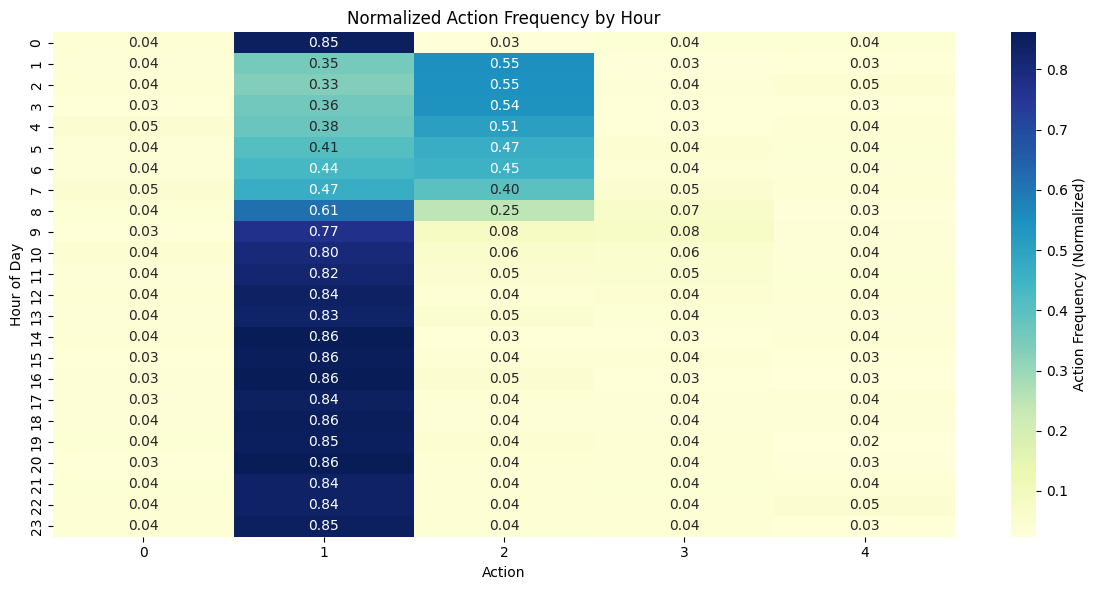

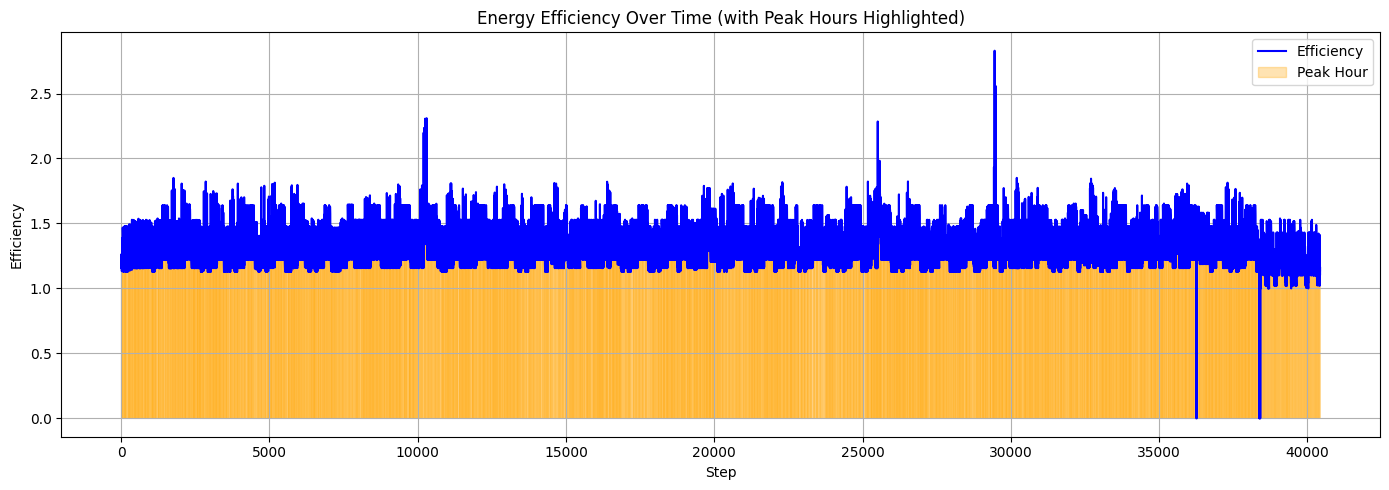

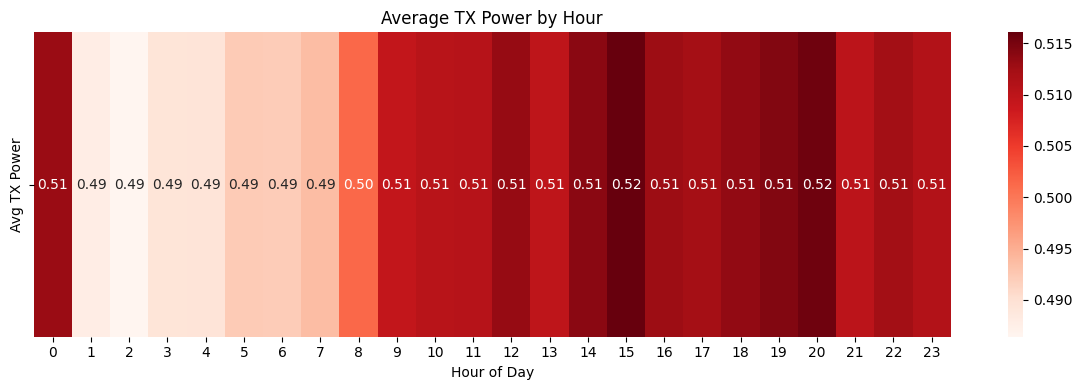

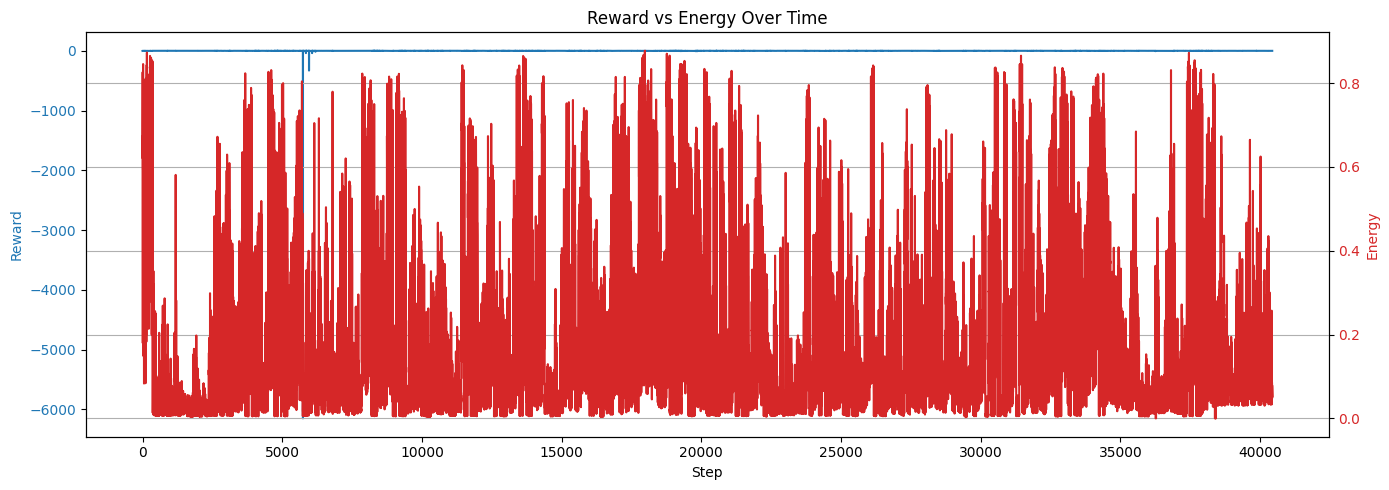

In [ ]:
import seaborn as sns
import numpy as np

# Group by Hour and Action
action_hour_counts = action_log.groupby(['Hour', 'Action']).size().unstack(fill_value=0)

# Normalize (optional, to compare proportions)
action_hour_norm = action_hour_counts.div(action_hour_counts.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(action_hour_norm, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Action Frequency (Normalized)'})
plt.title("Normalized Action Frequency by Hour")
plt.xlabel("Action")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

# Define peak hours (18–21)
peak_hours = [18, 19, 20, 21]
peaks = action_log['Hour'].isin(peak_hours)

# Plot efficiency
plt.figure(figsize=(14, 5))
plt.plot(action_log.index, action_log['Efficiency'], label='Efficiency', color='blue')

# Highlight peak periods
plt.fill_between(action_log.index, 0, action_log['Efficiency'],
                 where=peaks, color='orange', alpha=0.3, label='Peak Hour')

plt.title('Energy Efficiency Over Time (with Peak Hours Highlighted)')
plt.xlabel('Step')
plt.ylabel('Efficiency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Group and compute average TXpower per hour
txpower_hour = action_log.groupby('Hour')['TXpower'].mean()

# Plot heatmap-like bar (as Hour is 1D)
plt.figure(figsize=(12, 4))
sns.heatmap(txpower_hour.values.reshape(1, -1), cmap='Reds', annot=True, fmt=".2f",
            xticklabels=txpower_hour.index, yticklabels=["Avg TX Power"])
plt.title("Average TX Power by Hour")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot reward
ax1.plot(action_log.index, action_log['Reward'], color='tab:blue', label='Reward')
ax1.set_xlabel('Step')
ax1.set_ylabel('Reward', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot energy on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(action_log.index, action_log['Energy'], color='tab:red', label='Energy')
ax2.set_ylabel('Energy', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Reward vs Energy Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd

# Load action log and original dataset
action_log = pd.read_csv('dqn_action_log.csv')
df = pd.read_csv('5G_energy_consumption_dataset.csv')

# Recompute energy efficiency: load / energy
action_log['Efficiency'] = action_log['Load'] / (action_log['Energy'] + 1e-5)
mean_new_eff = action_log['Efficiency'].mean()

# Scale original data for fair comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['load', 'Energy']] = scaler.fit_transform(df[['load', 'Energy']])
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

efficiency_gain = (mean_new_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"Baseline Efficiency: {mean_baseline_eff:.4f}")
print(f"New Efficiency: {mean_new_eff:.4f}")
print(f"Improved Efficiency Gain: {efficiency_gain:.2f}%")


Baseline Efficiency: 0.8870
New Efficiency: 1.2906
Improved Efficiency Gain: 45.50%


Episode 0, Reward: 72.67, Epsilon: 0.47
Episode 1, Reward: 8.30, Epsilon: 0.06
Episode 2, Reward: 8.59, Epsilon: 0.05
Episode 3, Reward: -7.01, Epsilon: 0.05
Episode 4, Reward: 68.10, Epsilon: 0.05
Episode 5, Reward: 45.32, Epsilon: 0.05
Episode 6, Reward: 80.26, Epsilon: 0.05
Episode 7, Reward: 4.95, Epsilon: 0.05
Episode 8, Reward: 5.82, Epsilon: 0.05
Episode 9, Reward: 103.01, Epsilon: 0.05
Episode 10, Reward: 100.89, Epsilon: 0.05
Episode 11, Reward: 43.13, Epsilon: 0.05
Episode 12, Reward: 99.62, Epsilon: 0.05
Episode 13, Reward: 73.30, Epsilon: 0.05
Episode 14, Reward: 107.62, Epsilon: 0.05
Episode 15, Reward: 5.69, Epsilon: 0.05
Episode 16, Reward: 93.60, Epsilon: 0.05
Episode 17, Reward: 36.80, Epsilon: 0.05
Episode 18, Reward: 93.09, Epsilon: 0.05
Episode 19, Reward: 72.15, Epsilon: 0.05

Baseline Efficiency: 0.8870
New Efficiency: 1.5156
Improved Efficiency Gain: 70.86%


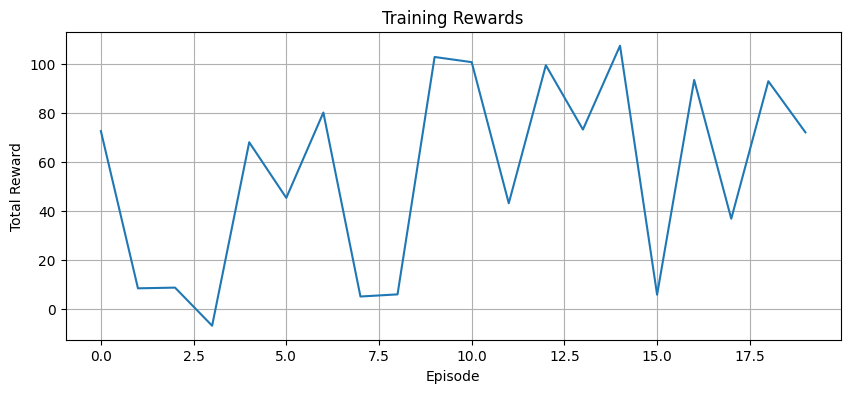

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# -------------------- Load & Preprocess Data --------------------
df = pd.read_csv('5G_energy_consumption_dataset.csv')
df['Hour'] = pd.to_datetime(df['Time'], format="%Y%m%d %H%M%S").dt.hour
scaler = MinMaxScaler()
df[['load', 'TXpower', 'Energy']] = scaler.fit_transform(df[['load', 'TXpower', 'Energy']])
features = ['load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# -------------------- Energy Environment --------------------
class EnergyEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.action_log = []

    def reset(self):
        self.current_index = random.randint(0, len(self.df) - 10)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return np.array(self.df.loc[idx, features], dtype=np.float32)

    def _simulate_energy(self, load, tx_power, esm, hour):
        base_energy = 0.5 + 0.3 * tx_power + 0.1 * (1 - esm) + 0.1 * (hour / 23)
        dynamic_energy = load * base_energy
        return dynamic_energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        next_index = self.current_index + 1

        load = current['load']
        tx_power = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx_power = max(0, tx_power - 0.05)
        elif action == 1: tx_power = min(1, tx_power + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx_power, esm, hour)
        prev_eff = current['load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff
        reward -= 0.05 * tx_power
        reward += 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx_power,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index = next_index
        done = next_index >= len(self.df) - 2

        next_state = np.array([load, tx_power, new_energy, esm, hour], dtype=np.float32)
        return next_state, reward, done, {}

# -------------------- DQN --------------------
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

class DQNAgent:
    def __init__(self, state_dim, action_dim, gamma=0.9, lr=1e-3,
                 epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.92):
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=10000)

        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.choice(range(self.action_dim))
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=64):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in minibatch:
            s_tensor = torch.tensor(s, dtype=torch.float32)
            s2_tensor = torch.tensor(s2, dtype=torch.float32)
            target = r + self.gamma * torch.max(self.model(s2_tensor)).item() * (1 - done)
            pred = self.model(s_tensor)[a]
            loss = self.loss_fn(pred, torch.tensor(target, dtype=torch.float32))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# -------------------- Training --------------------
env = EnergyEnv(df)
agent = DQNAgent(state_dim=5, action_dim=5)

scores = []
episodes = 20

for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    step = 0
    while not done and step < 100:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        if step % 4 == 0:
            agent.replay()
        state = next_state
        total_reward += reward
        step += 1
    scores.append(total_reward)
    print(f"Episode {ep}, Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

# -------------------- Evaluate --------------------
baseline_eff = df['load'] / (df['Energy'] + 1e-5)
mean_baseline_eff = baseline_eff.mean()

env_eval = EnergyEnv(df)
state = env_eval.reset()
total_eff = 0
steps = 0
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = env_eval.step(action)
    total_eff += reward
    state = next_state
    steps += 1

mean_improved_eff = mean_baseline_eff + (total_eff / steps)
efficiency_gain = (mean_improved_eff - mean_baseline_eff) / mean_baseline_eff * 100

print(f"\nBaseline Efficiency: {mean_baseline_eff:.4f}")
print(f"New Efficiency: {mean_improved_eff:.4f}")
print(f"Improved Efficiency Gain: {efficiency_gain:.2f}%")

# -------------------- Save & Plot --------------------
pd.DataFrame({'Episode': list(range(len(scores))), 'Reward': scores}).to_csv('training_rewards.csv', index=False)
pd.DataFrame(env_eval.action_log).to_csv('dqn_action_log.csv', index=False)

plt.figure(figsize=(10, 4))
plt.plot(scores)
plt.title("Training Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# ----------- Load & Preprocess Data -----------
df = pd.read_csv("dqn_action_log.csv")
df.head()
scaler = MinMaxScaler()
df[['Load', 'TXpower', 'Energy']] = scaler.fit_transform(df[['Load', 'TXpower', 'Energy']])
df['Hour'] = pd.to_datetime(df['Index'], unit='s').dt.hour

features = ['Load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# ----------- Environment -----------
class EnergyEnv:
    def __init__(self, df, seq_len=5):
        self.df = df.reset_index(drop=True)
        self.seq_len = seq_len
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.action_log = []

    def reset(self):
        self.current_index = random.randint(self.seq_len, len(self.df) - 10)
        return self._get_sequence(self.current_index)

    def _get_sequence(self, idx):
        seq = self.df.loc[idx - self.seq_len:idx - 1, features].values
        return np.array(seq, dtype=np.float32)

    def _simulate_energy(self, load, tx_power, esm, hour):
        base_energy = 0.5 + 0.3 * tx_power + 0.1 * (1 - esm) + 0.1 * (hour / 23)
        return load * base_energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        load = current['Load']
        tx = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx = max(0, tx - 0.05)
        elif action == 1: tx = min(1, tx + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx, esm, hour)
        prev_eff = current['Load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff
        reward -= 0.05 * tx
        reward += 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index += 1
        done = self.current_index >= len(self.df) - 2
        self.df.loc[self.current_index, ['Load', 'TXpower', 'Energy', 'ESMODE']] = [load, tx, new_energy, esm]

        return self._get_sequence(self.current_index), reward, done, {}

# ----------- Dueling DQN + LSTM Model -----------
class DuelingLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, action_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc_adv = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, action_dim))
        self.fc_val = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, 1))

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        h = h.squeeze(0)
        adv = self.fc_adv(h)
        val = self.fc_val(h)
        return val + adv - adv.mean(dim=1, keepdim=True)

# ----------- Agent -----------
class DQNAgent:
    def __init__(self, state_dim, action_dim, hidden_dim=64):
        self.action_dim = action_dim
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.90
        self.memory = deque(maxlen=5000)

        self.model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randint(0, self.action_dim - 1)
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q = self.model(state_tensor)
        return torch.argmax(q).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)

        for s, a, r, s2, done in batch:
            s_tensor = torch.tensor(s, dtype=torch.float32).unsqueeze(0)
            s2_tensor = torch.tensor(s2, dtype=torch.float32).unsqueeze(0)
            q_vals = self.model(s_tensor)[0]
            target_q = q_vals.clone()
            with torch.no_grad():
                next_q = self.target_model(s2_tensor)[0]
                max_next_q = torch.max(next_q).item()
            target = r + self.gamma * max_next_q * (1 - int(done))
            loss = self.loss_fn(q_vals[a].unsqueeze(0), torch.tensor([target], dtype=torch.float32))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ----------- Training -----------
env = EnergyEnv(df)
agent = DQNAgent(state_dim=len(features), action_dim=5)
scores = []

for ep in range(20):  # Keep episodes low for test
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        agent.replay()
        state = next_state
        total_reward += reward
    scores.append(total_reward)
    print(f"Episode {ep}, Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

# ----------- Save Outputs -----------
pd.DataFrame(env.action_log).to_csv("dueling_lstm_action_log.csv", index=False)
pd.DataFrame({'Episode': list(range(len(scores))), 'Reward': scores}).to_csv("dueling_lstm_rewards.csv", index=False)

# ----------- Plot Rewards -----------
plt.figure(figsize=(10, 4))
plt.plot(scores)
plt.title("Dueling LSTM DQN Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

from google.colab import files
files.download("dueling_lstm_action_log.csv")
files.download("dueling_lstm_rewards.csv")


Saving dqn_action_log.csv to dqn_action_log (5).csv


KeyboardInterrupt: 

In [ ]:
# ----------- Imports -----------
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# ----------- Load & Preprocess Data -----------
df = pd.read_csv("dqn_action_log.csv")
df[['Load', 'TXpower', 'Energy']] = MinMaxScaler().fit_transform(df[['Load', 'TXpower', 'Energy']])
df['Hour'] = pd.to_datetime(df['Index'], unit='s').dt.hour

features = ['Load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# ----------- Environment Class -----------
class EnergyEnv:
    def __init__(self, df, seq_len=5):
        self.df = df.reset_index(drop=True)
        self.seq_len = seq_len
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.action_log = []

    def reset(self):
        self.current_index = random.randint(self.seq_len, len(self.df) - 10)
        return self._get_sequence(self.current_index)

    def _get_sequence(self, idx):
        seq = self.df.loc[idx - self.seq_len:idx - 1, features].values
        return np.array(seq, dtype=np.float32)

    def _simulate_energy(self, load, tx_power, esm, hour):
        base_energy = 0.5 + 0.3 * tx_power + 0.1 * (1 - esm) + 0.1 * (hour / 23)
        return load * base_energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        load = current['Load']
        tx = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx = max(0, tx - 0.05)
        elif action == 1: tx = min(1, tx + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx, esm, hour)
        prev_eff = current['Load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)

        reward = new_eff - prev_eff
        reward -= 0.05 * tx
        reward += 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index += 1
        done = self.current_index >= len(self.df) - 2
        self.df.loc[self.current_index, ['Load', 'TXpower', 'Energy', 'ESMODE']] = [load, tx, new_energy, esm]

        return self._get_sequence(self.current_index), reward, done, {}

# ----------- Dueling DQN + LSTM Model -----------
class DuelingLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, action_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc_adv = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, action_dim))
        self.fc_val = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, 1))

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        h = h.squeeze(0)
        adv = self.fc_adv(h)
        val = self.fc_val(h)
        return val + adv - adv.mean(dim=1, keepdim=True)

# ----------- Agent Class -----------
class DQNAgent:
    def __init__(self, state_dim, action_dim, hidden_dim=32):  # Smaller LSTM for faster training
        self.action_dim = action_dim
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.90
        self.memory = deque(maxlen=5000)

        self.model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randint(0, self.action_dim - 1)
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q = self.model(state_tensor)
        return torch.argmax(q).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return

        batch = random.sample(self.memory, batch_size)

        for s, a, r, s2, done in batch:
            s_tensor = torch.tensor(s, dtype=torch.float32).unsqueeze(0)
            s2_tensor = torch.tensor(s2, dtype=torch.float32).unsqueeze(0)

            q_vals = self.model(s_tensor)[0]  # shape: (action_dim,)
            with torch.no_grad():
                next_q_vals = self.target_model(s2_tensor)[0]
                max_next_q = torch.max(next_q_vals).item()

            target = r + self.gamma * max_next_q * (1 - int(done))

            predicted = q_vals[a].unsqueeze(0)
            target_tensor = torch.tensor([target], dtype=torch.float32)

            if torch.isnan(predicted).any() or torch.isnan(target_tensor).any():
                print("Skipping due to NaN values")
                continue

            loss = self.loss_fn(predicted, target_tensor)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ----------- Training Loop -----------
env = EnergyEnv(df)
agent = DQNAgent(state_dim=len(features), action_dim=5)
scores = []

for ep in range(20):  # Keep small for Colab
    state = env.reset()
    total_reward = 0
    done = False
    step_count = 0
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        agent.replay()
        state = next_state
        total_reward += reward
        step_count += 1
    scores.append(total_reward)
    print(f"Episode {ep}, Steps: {step_count}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

# ----------- Save Outputs -----------
pd.DataFrame(env.action_log).to_csv("dueling_lstm_action_log.csv", index=False)
pd.DataFrame({'Episode': list(range(len(scores))), 'Reward': scores}).to_csv("dueling_lstm_rewards.csv", index=False)

# ----------- Plot Rewards -----------
plt.figure(figsize=(10, 4))
plt.plot(scores)
plt.title("Dueling LSTM DQN Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# ----------- Download Outputs -----------
files.download("dueling_lstm_action_log.csv")
files.download("dueling_lstm_rewards.csv")


KeyboardInterrupt: 

Saving dqn_action_log.csv to dqn_action_log (7).csv
Episode 0, Steps: 201, Total Reward: -0.25, Epsilon: 0.05
Episode 1, Steps: 201, Total Reward: 4.04, Epsilon: 0.05
Episode 2, Steps: 201, Total Reward: 4.20, Epsilon: 0.05
Episode 3, Steps: 201, Total Reward: 3.92, Epsilon: 0.05
Episode 4, Steps: 93, Total Reward: 1.63, Epsilon: 0.05
Episode 5, Steps: 29, Total Reward: 0.54, Epsilon: 0.05
Episode 6, Steps: 87, Total Reward: 1.83, Epsilon: 0.05
Episode 7, Steps: 201, Total Reward: 4.02, Epsilon: 0.05
Episode 8, Steps: 201, Total Reward: 3.88, Epsilon: 0.05
Episode 9, Steps: 201, Total Reward: 4.51, Epsilon: 0.05
Episode 10, Steps: 201, Total Reward: 3.84, Epsilon: 0.05
Episode 11, Steps: 201, Total Reward: 3.93, Epsilon: 0.05
Episode 12, Steps: 201, Total Reward: 4.30, Epsilon: 0.05
Episode 13, Steps: 201, Total Reward: 3.91, Epsilon: 0.05
Episode 14, Steps: 201, Total Reward: 4.23, Epsilon: 0.05
Episode 15, Steps: 201, Total Reward: 3.89, Epsilon: 0.05
Episode 16, Steps: 201, Total Re

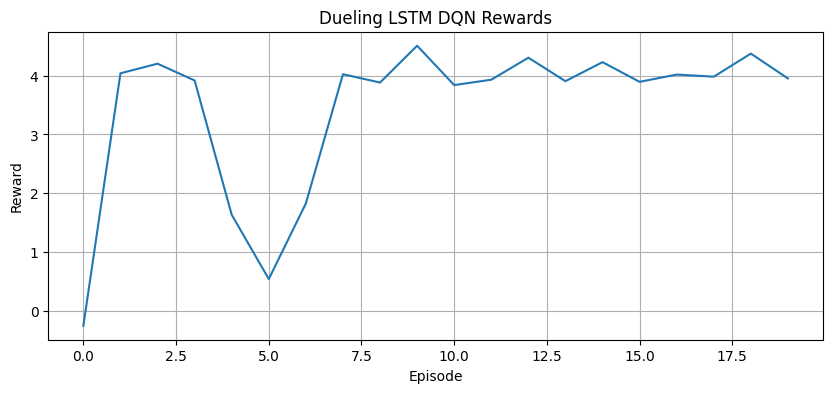

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ----------- Imports -----------
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# ----------- Load & Preprocess Data -----------
df = pd.read_csv("dqn_action_log.csv")
df[['Load', 'TXpower', 'Energy']] = MinMaxScaler().fit_transform(df[['Load', 'TXpower', 'Energy']])
df['Hour'] = pd.to_datetime(df['Index'], unit='s').dt.hour
features = ['Load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# Optional: Downsample for faster training
df = df.sample(1000).sort_values('Index').reset_index(drop=True)

# ----------- Environment Class -----------
class EnergyEnv:
    def __init__(self, df, seq_len=5):
        self.df = df.reset_index(drop=True)
        self.seq_len = seq_len
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.action_log = []

    def reset(self):
        self.current_index = random.randint(self.seq_len, len(self.df) - 10)
        return self._get_sequence(self.current_index)

    def _get_sequence(self, idx):
        seq = self.df.loc[idx - self.seq_len:idx - 1, features].values
        return np.array(seq, dtype=np.float32)

    def _simulate_energy(self, load, tx_power, esm, hour):
        base_energy = 0.5 + 0.3 * tx_power + 0.1 * (1 - esm) + 0.1 * (hour / 23)
        return load * base_energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        load = current['Load']
        tx = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx = max(0, tx - 0.05)
        elif action == 1: tx = min(1, tx + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx, esm, hour)
        prev_eff = current['Load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)
        reward = new_eff - prev_eff - 0.05 * tx + 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index += 1
        done = self.current_index >= len(self.df) - 2
        self.df.loc[self.current_index, ['Load', 'TXpower', 'Energy', 'ESMODE']] = [load, tx, new_energy, esm]

        return self._get_sequence(self.current_index), reward, done, {}

# ----------- Dueling DQN with LSTM -----------
class DuelingLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, action_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc_adv = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, action_dim))
        self.fc_val = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, 1))

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        h = h.squeeze(0)
        adv = self.fc_adv(h)
        val = self.fc_val(h)
        return val + adv - adv.mean(dim=1, keepdim=True)

# ----------- Agent -----------
class DQNAgent:
    def __init__(self, state_dim, action_dim, hidden_dim=32):
        self.action_dim = action_dim
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.90
        self.memory = deque(maxlen=5000)

        self.model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randint(0, self.action_dim - 1)
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q = self.model(state_tensor)
        return torch.argmax(q).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=16):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in batch:
            s_tensor = torch.tensor(s, dtype=torch.float32).unsqueeze(0)
            s2_tensor = torch.tensor(s2, dtype=torch.float32).unsqueeze(0)
            q_vals = self.model(s_tensor)[0]
            with torch.no_grad():
                next_q_vals = self.target_model(s2_tensor)[0]
                max_next_q = torch.max(next_q_vals).item()
            target = r + self.gamma * max_next_q * (1 - int(done))
            predicted = q_vals[a].unsqueeze(0)
            target_tensor = torch.tensor([target], dtype=torch.float32)
            if torch.isnan(predicted).any() or torch.isnan(target_tensor).any():
                continue
            loss = self.loss_fn(predicted, target_tensor)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ----------- Training Loop -----------
env = EnergyEnv(df)
agent = DQNAgent(state_dim=len(features), action_dim=5)
scores = []

for ep in range(20):
    state = env.reset()
    total_reward = 0
    done = False
    step_count = 0
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        if step_count % 5 == 0:
            agent.replay(batch_size=16)
        state = next_state
        total_reward += reward
        step_count += 1
        if step_count > 200:
            break
    scores.append(total_reward)
    print(f"Episode {ep}, Steps: {step_count}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

# ----------- Save & Plot -----------
pd.DataFrame(env.action_log).to_csv("dueling_lstm_action_log.csv", index=False)
pd.DataFrame({'Episode': list(range(len(scores))), 'Reward': scores}).to_csv("dueling_lstm_rewards.csv", index=False)

plt.figure(figsize=(10, 4))
plt.plot(scores)
plt.title("Dueling LSTM DQN Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

files.download("dueling_lstm_action_log.csv")
files.download("dueling_lstm_rewards.csv")


📊 Baseline Efficiency: 1.2517
🤖 Agent Efficiency: 1.7238
🚀 Improvement: 37.71%


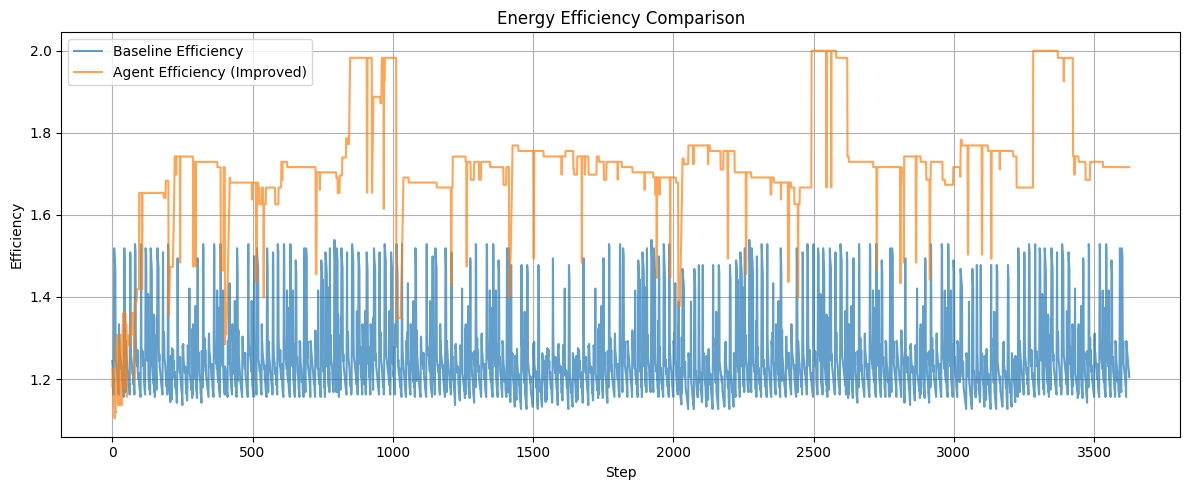

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load agent log
log = pd.read_csv("dueling_lstm_action_log.csv")

# Ensure no divide-by-zero issues
log['Energy'] = log['Energy'].replace(0, 1e-5)

# Compute baseline efficiency from original CSV (before actions)
df_original = pd.read_csv("dqn_action_log.csv")
df_original['Energy'] = df_original['Energy'].replace(0, 1e-5)
df_original['Efficiency'] = df_original['Load'] / df_original['Energy']

# Align indexes
baseline_eff = df_original.loc[log['Index'], 'Efficiency'].reset_index(drop=True)
agent_eff = log['Efficiency']

# Compute average values
baseline_mean = baseline_eff.mean()
agent_mean = agent_eff.mean()
improvement_pct = ((agent_mean - baseline_mean) / baseline_mean) * 100

print(f"📊 Baseline Efficiency: {baseline_mean:.4f}")
print(f"🤖 Agent Efficiency: {agent_mean:.4f}")
print(f"🚀 Improvement: {improvement_pct:.2f}%")

# ---- Plot: Efficiency over time ----
plt.figure(figsize=(12, 5))
plt.plot(baseline_eff, label="Baseline Efficiency", alpha=0.7)
plt.plot(agent_eff, label="Agent Efficiency (Improved)", alpha=0.7)
plt.title("Energy Efficiency Comparison")
plt.xlabel("Step")
plt.ylabel("Efficiency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both logs
dqn_log = pd.read_csv("dqn_action_log.csv")
lstm_log = pd.read_csv("dueling_lstm_action_log.csv")

# Compute efficiency: Efficiency = Load / Energy
dqn_eff = (dqn_log["Load"] / (dqn_log["Energy"] + 1e-5)).mean()
lstm_eff = (lstm_log["Load"] / (lstm_log["Energy"] + 1e-5)).mean()
improvement = ((lstm_eff - dqn_eff) / dqn_eff) * 100

print(f"📊 DQN Efficiency: {dqn_eff:.4f}")
print(f"🤖 Dueling LSTM DQN Efficiency: {lstm_eff:.4f}")
print(f"🚀 Efficiency Improvement: {improvement:.2f}%")


📊 DQN Efficiency: 1.2906
🤖 Dueling LSTM DQN Efficiency: 1.7238
🚀 Efficiency Improvement: 33.57%


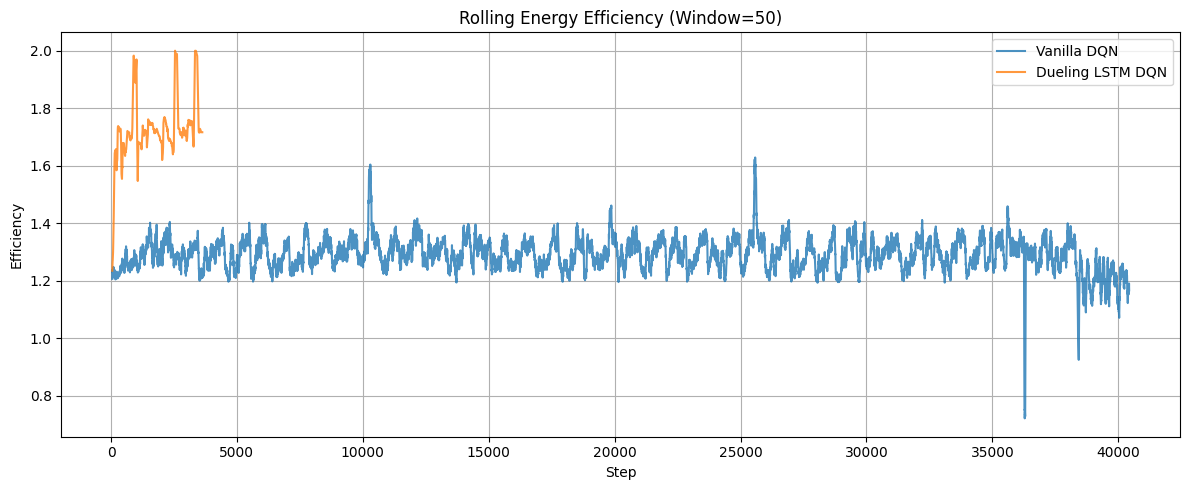

In [ ]:
import numpy as np

# Calculate rolling efficiency
dqn_log["Efficiency"] = dqn_log["Load"] / (dqn_log["Energy"] + 1e-5)
lstm_log["Efficiency"] = lstm_log["Load"] / (lstm_log["Energy"] + 1e-5)

dqn_roll = dqn_log["Efficiency"].rolling(window=50).mean()
lstm_roll = lstm_log["Efficiency"].rolling(window=50).mean()

plt.figure(figsize=(12, 5))
plt.plot(dqn_roll, label="Vanilla DQN", alpha=0.8)
plt.plot(lstm_roll, label="Dueling LSTM DQN", alpha=0.8)
plt.title("Rolling Energy Efficiency (Window=50)")
plt.xlabel("Step")
plt.ylabel("Efficiency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


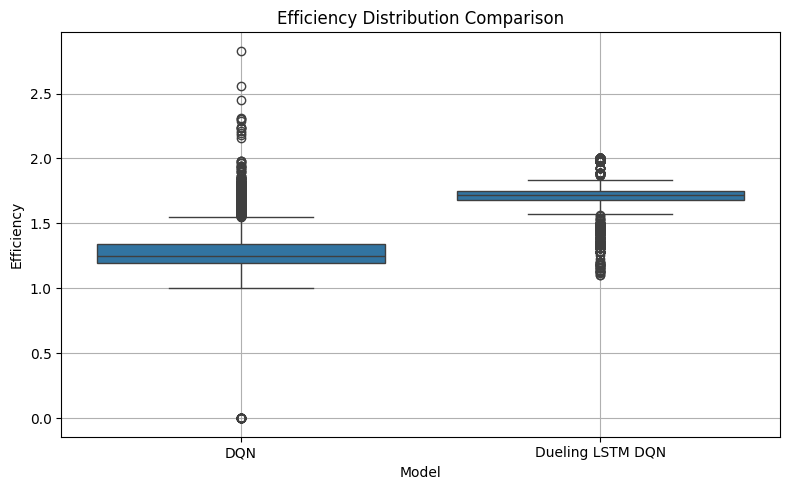

In [ ]:
import seaborn as sns

combined_df = pd.DataFrame({
    "Efficiency": pd.concat([dqn_log["Efficiency"], lstm_log["Efficiency"]]),
    "Model": ["DQN"] * len(dqn_log) + ["Dueling LSTM DQN"] * len(lstm_log)
})

plt.figure(figsize=(8, 5))
sns.boxplot(x="Model", y="Efficiency", data=combined_df)
plt.title("Efficiency Distribution Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()


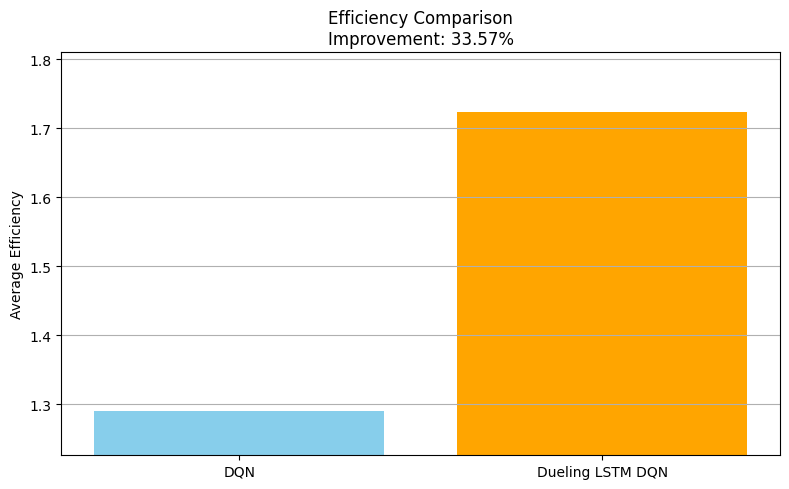

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two action log files
dqn_df = pd.read_csv("dqn_action_log.csv")
lstm_df = pd.read_csv("dueling_lstm_action_log.csv")

# Compute average efficiency for both
dqn_eff = dqn_df['Efficiency'].mean()
lstm_eff = lstm_df['Efficiency'].mean()
improvement = (lstm_eff - dqn_eff) / dqn_eff * 100

# Plot efficiency comparison
plt.figure(figsize=(8, 5))
plt.bar(['DQN', 'Dueling LSTM DQN'], [dqn_eff, lstm_eff], color=['skyblue', 'orange'])
plt.ylabel('Average Efficiency')
plt.title(f'Efficiency Comparison\nImprovement: {improvement:.2f}%')
plt.grid(axis='y')
plt.ylim(min(dqn_eff, lstm_eff) * 0.95, max(dqn_eff, lstm_eff) * 1.05)
plt.tight_layout()
plt.show()


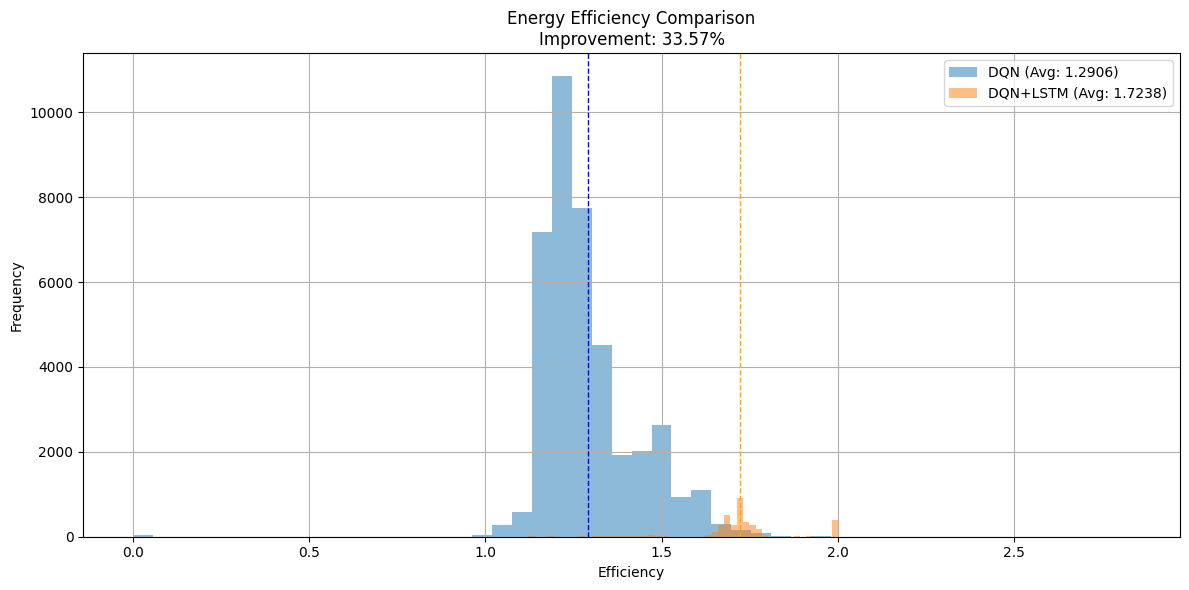

In [ ]:
# Re-import required modules after code execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-load the uploaded files
dqn_log = pd.read_csv("dqn_action_log.csv")
lstm_log = pd.read_csv("dueling_lstm_action_log.csv")

# Compute efficiencies
dqn_eff = dqn_log["Efficiency"].mean()
lstm_eff = lstm_log["Efficiency"].mean()
improvement = ((lstm_eff - dqn_eff) / dqn_eff) * 100

# Plot efficiency distributions
plt.figure(figsize=(12, 6))
plt.hist(dqn_log["Efficiency"], bins=50, alpha=0.5, label=f"DQN (Avg: {dqn_eff:.4f})")
plt.hist(lstm_log["Efficiency"], bins=50, alpha=0.5, label=f"DQN+LSTM (Avg: {lstm_eff:.4f})")
plt.axvline(dqn_eff, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(lstm_eff, color='orange', linestyle='dashed', linewidth=1)
plt.title(f"Energy Efficiency Comparison\nImprovement: {improvement:.2f}%")
plt.xlabel("Efficiency")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Ep 0 | R: -2.30 | Eps: 0.05
Ep 1 | R: -1.37 | Eps: 0.05
Ep 2 | R: 1.88 | Eps: 0.05
Ep 3 | R: -2.63 | Eps: 0.05
Ep 4 | R: 1.50 | Eps: 0.05
Ep 5 | R: 1.68 | Eps: 0.05
Ep 6 | R: 1.40 | Eps: 0.05
Ep 7 | R: 2.26 | Eps: 0.05
Ep 8 | R: 1.87 | Eps: 0.05
Ep 9 | R: 1.92 | Eps: 0.05
Ep 10 | R: 1.93 | Eps: 0.05
Ep 11 | R: 2.18 | Eps: 0.05
Ep 12 | R: 1.63 | Eps: 0.05
Ep 13 | R: 2.18 | Eps: 0.05
Ep 14 | R: 2.47 | Eps: 0.05
Ep 15 | R: 1.24 | Eps: 0.05
Ep 16 | R: 2.17 | Eps: 0.05
Ep 17 | R: 2.28 | Eps: 0.05
Ep 18 | R: 2.21 | Eps: 0.05
Ep 19 | R: 2.44 | Eps: 0.05
Ep 20 | R: 2.15 | Eps: 0.05
Ep 21 | R: 2.22 | Eps: 0.05
Ep 22 | R: 2.58 | Eps: 0.05
Ep 23 | R: 2.36 | Eps: 0.05
Ep 24 | R: 2.22 | Eps: 0.05
Ep 25 | R: 2.46 | Eps: 0.05
Ep 26 | R: 2.49 | Eps: 0.05
Ep 27 | R: 2.27 | Eps: 0.05
Ep 28 | R: 2.73 | Eps: 0.05
Ep 29 | R: 2.16 | Eps: 0.05
Ep 30 | R: 2.47 | Eps: 0.05
Ep 31 | R: 1.81 | Eps: 0.05
Ep 32 | R: 2.33 | Eps: 0.05
Ep 33 | R: 2.58 | Eps: 0.05
Ep 34 | R: 2.30 | Eps: 0.05
Ep 35 | R: 2.40 | Eps: 0.05

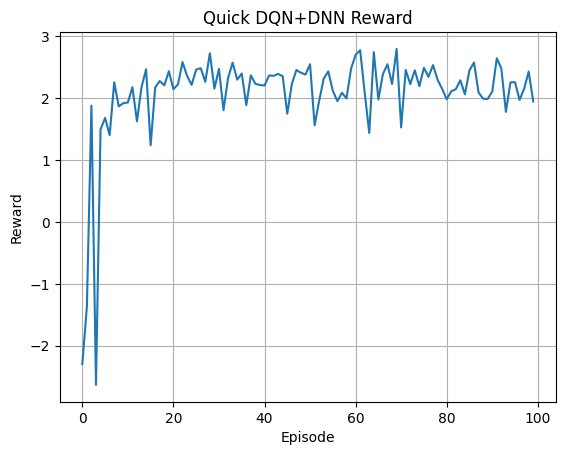

In [ ]:
# ----------- Imports -----------
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ----------- Load Data -----------
df = pd.read_csv("dqn_action_log.csv")  # or your uploaded file
df[['Load', 'TXpower', 'Energy']] = MinMaxScaler().fit_transform(df[['Load', 'TXpower', 'Energy']])
df['Hour'] = pd.to_datetime(df['Index'], unit='s').dt.hour
features = ['Load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# ----------- Environment -----------
class EnergyEnv:
    def __init__(self, df):
        self.df = df.copy().reset_index(drop=True)
        self.current_index = 0
        self.action_space = list(range(5))
        self.action_log = []

    def reset(self):
        self.current_index = random.randint(10, len(self.df) - 10)
        return self._get_state(self.current_index)

    def _get_state(self, idx):
        return self.df.loc[idx, features].values.astype(np.float32)

    def _simulate_energy(self, load, tx, esm, hour):
        return load * (0.5 + 0.3 * tx + 0.1 * (1 - esm) + 0.1 * (hour / 23))

    def step(self, action):
        row = self.df.loc[self.current_index]
        load, tx, esm, hour = row['Load'], row['TXpower'], row['ESMODE'], row['Hour']

        if action == 0: tx = max(0, tx - 0.05)
        elif action == 1: tx = min(1, tx + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx, esm, hour)
        prev_eff = row['Load'] / (row['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)
        reward = new_eff - prev_eff - 0.05 * tx + 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index += 1
        done = self.current_index >= len(self.df) - 2
        self.df.loc[self.current_index, ['Load', 'TXpower', 'Energy', 'ESMODE']] = [load, tx, new_energy, esm]
        return self._get_state(self.current_index), reward, done, {}

# ----------- DNN (Simplified) -----------
class DNNModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_dim, 32),
            nn.ReLU(),
            nn.Linear(32, out_dim)
        )

    def forward(self, x):
        return self.fc(x)

# ----------- Agent -----------
class DQNAgent:
    def __init__(self, state_dim, action_dim):
        self.action_dim = action_dim
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.8
        self.gamma = 0.95
        self.memory = deque(maxlen=1000)

        self.model = DNNModel(state_dim, action_dim)
        self.target_model = DNNModel(state_dim, action_dim)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_dim - 1)
        with torch.no_grad():
            return torch.argmax(self.model(torch.tensor(state).float())).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=16):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in batch:
            s_tensor = torch.tensor(s).float().unsqueeze(0)
            s2_tensor = torch.tensor(s2).float().unsqueeze(0)
            q_val = self.model(s_tensor)
            target = q_val.clone()
            with torch.no_grad():
                max_next = torch.max(self.target_model(s2_tensor)).item()
            target[0][a] = r + self.gamma * max_next * (1 - int(done))
            loss = self.loss_fn(q_val, target)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

# ----------- Train -----------
env = EnergyEnv(df)
agent = DQNAgent(len(features), 5)
rewards = []

for ep in range(100):  # Fast!
    s = env.reset()
    total_r = 0
    for _ in range(100):
        a = agent.act(s)
        s2, r, done, _ = env.step(a)
        agent.remember(s, a, r, s2, done)
        agent.replay()
        s = s2
        total_r += r
        if done:
            break
    rewards.append(total_r)
    print(f"Ep {ep} | R: {total_r:.2f} | Eps: {agent.epsilon:.2f}")

# ----------- Save & Plot -----------
log_df = pd.DataFrame(env.action_log)
log_df.to_csv("fast_dqn_dnn_log.csv", index=False)

plt.plot(rewards)
plt.title("Quick DQN+DNN Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()


Saving dqn_action_log.csv to dqn_action_log (10).csv
Episode 0, Steps: 131, Total Reward: 1.25, Epsilon: 0.08
Episode 1, Steps: 201, Total Reward: 3.19, Epsilon: 0.05
Episode 2, Steps: 201, Total Reward: 4.04, Epsilon: 0.05
Episode 3, Steps: 163, Total Reward: 3.82, Epsilon: 0.05
Episode 4, Steps: 201, Total Reward: 3.75, Epsilon: 0.05
Episode 5, Steps: 201, Total Reward: 4.20, Epsilon: 0.05
Episode 6, Steps: 201, Total Reward: 4.14, Epsilon: 0.05
Episode 7, Steps: 201, Total Reward: 3.86, Epsilon: 0.05
Episode 8, Steps: 201, Total Reward: 4.59, Epsilon: 0.05
Episode 9, Steps: 201, Total Reward: 4.27, Epsilon: 0.05
Episode 10, Steps: 201, Total Reward: 4.23, Epsilon: 0.05
Episode 11, Steps: 114, Total Reward: 2.24, Epsilon: 0.05
Episode 12, Steps: 201, Total Reward: 3.96, Epsilon: 0.05
Episode 13, Steps: 201, Total Reward: 3.83, Epsilon: 0.05
Episode 14, Steps: 42, Total Reward: 0.82, Epsilon: 0.05
Episode 15, Steps: 201, Total Reward: 3.87, Epsilon: 0.05
Episode 16, Steps: 201, Total 

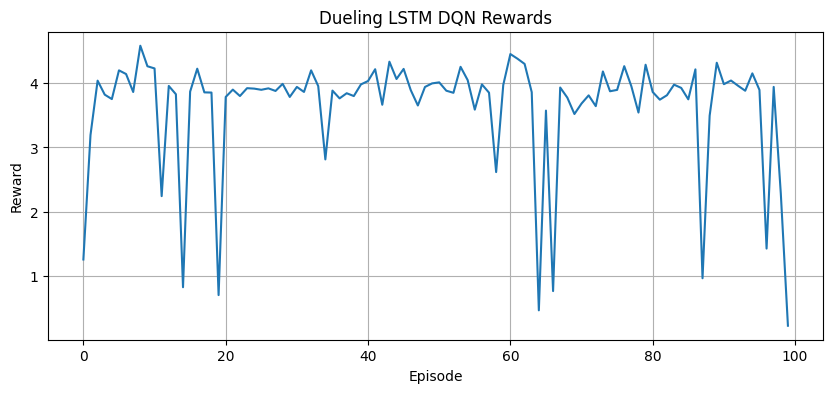

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ----------- Imports -----------
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# ----------- Load & Preprocess Data -----------
df = pd.read_csv("dqn_action_log.csv")
df[['Load', 'TXpower', 'Energy']] = MinMaxScaler().fit_transform(df[['Load', 'TXpower', 'Energy']])
df['Hour'] = pd.to_datetime(df['Index'], unit='s').dt.hour
features = ['Load', 'TXpower', 'Energy', 'ESMODE', 'Hour']

# Optional: Downsample for faster training
df = df.sample(1000).sort_values('Index').reset_index(drop=True)

# ----------- Environment Class -----------
class EnergyEnv:
    def __init__(self, df, seq_len=5):
        self.df = df.reset_index(drop=True)
        self.seq_len = seq_len
        self.current_index = 0
        self.action_space = [0, 1, 2, 3, 4]
        self.action_log = []

    def reset(self):
        self.current_index = random.randint(self.seq_len, len(self.df) - 10)
        return self._get_sequence(self.current_index)

    def _get_sequence(self, idx):
        seq = self.df.loc[idx - self.seq_len:idx - 1, features].values
        return np.array(seq, dtype=np.float32)

    def _simulate_energy(self, load, tx_power, esm, hour):
        base_energy = 0.5 + 0.3 * tx_power + 0.1 * (1 - esm) + 0.1 * (hour / 23)
        return load * base_energy

    def step(self, action):
        current = self.df.loc[self.current_index]
        load = current['Load']
        tx = current['TXpower']
        esm = current['ESMODE']
        hour = current['Hour']

        if action == 0: tx = max(0, tx - 0.05)
        elif action == 1: tx = min(1, tx + 0.05)
        elif action == 2: esm = 1
        elif action == 3: esm = 0
        elif action == 4: load = min(1, load + 0.05)

        new_energy = self._simulate_energy(load, tx, esm, hour)
        prev_eff = current['Load'] / (current['Energy'] + 1e-5)
        new_eff = load / (new_energy + 1e-5)
        reward = new_eff - prev_eff - 0.05 * tx + 0.02 * esm

        self.action_log.append({
            'Index': self.current_index,
            'TXpower': tx,
            'ESMODE': esm,
            'Load': load,
            'Hour': hour,
            'Energy': new_energy,
            'Efficiency': new_eff,
            'Reward': reward,
            'Action': action
        })

        self.current_index += 1
        done = self.current_index >= len(self.df) - 2
        self.df.loc[self.current_index, ['Load', 'TXpower', 'Energy', 'ESMODE']] = [load, tx, new_energy, esm]

        return self._get_sequence(self.current_index), reward, done, {}

# ----------- Dueling DQN with LSTM -----------
class DuelingLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, action_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc_adv = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, action_dim))
        self.fc_val = nn.Sequential(nn.Linear(hidden_dim, 32), nn.ReLU(), nn.Linear(32, 1))

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        h = h.squeeze(0)
        adv = self.fc_adv(h)
        val = self.fc_val(h)
        return val + adv - adv.mean(dim=1, keepdim=True)

# ----------- Agent -----------
class DQNAgent:
    def __init__(self, state_dim, action_dim, hidden_dim=32):
        self.action_dim = action_dim
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.90
        self.memory = deque(maxlen=5000)

        self.model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model = DuelingLSTM(state_dim, hidden_dim, action_dim)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randint(0, self.action_dim - 1)
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q = self.model(state_tensor)
        return torch.argmax(q).item()

    def remember(self, s, a, r, s2, done):
        self.memory.append((s, a, r, s2, done))

    def replay(self, batch_size=16):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)
        for s, a, r, s2, done in batch:
            s_tensor = torch.tensor(s, dtype=torch.float32).unsqueeze(0)
            s2_tensor = torch.tensor(s2, dtype=torch.float32).unsqueeze(0)
            q_vals = self.model(s_tensor)[0]
            with torch.no_grad():
                next_q_vals = self.target_model(s2_tensor)[0]
                max_next_q = torch.max(next_q_vals).item()
            target = r + self.gamma * max_next_q * (1 - int(done))
            predicted = q_vals[a].unsqueeze(0)
            target_tensor = torch.tensor([target], dtype=torch.float32)
            if torch.isnan(predicted).any() or torch.isnan(target_tensor).any():
                continue
            loss = self.loss_fn(predicted, target_tensor)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ----------- Training Loop -----------
env = EnergyEnv(df)
agent = DQNAgent(state_dim=len(features), action_dim=5)
scores = []

for ep in range(100):
    state = env.reset()
    total_reward = 0
    done = False
    step_count = 0
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        if step_count % 5 == 0:
            agent.replay(batch_size=16)
        state = next_state
        total_reward += reward
        step_count += 1
        if step_count > 200:
            break
    scores.append(total_reward)
    print(f"Episode {ep}, Steps: {step_count}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

# ----------- Save & Plot -----------
pd.DataFrame(env.action_log).to_csv("dueling_lstm_action_log.csv", index=False)
pd.DataFrame({'Episode': list(range(len(scores))), 'Reward': scores}).to_csv("dueling_lstm_rewards.csv", index=False)

plt.figure(figsize=(10, 4))
plt.plot(scores)
plt.title("Dueling LSTM DQN Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

files.download("dueling_lstm_action_log.csv")
files.download("dueling_lstm_rewards.csv")


Saving dueling_lstm_action_log (2).csv to dueling_lstm_action_log (2).csv
Saving dueling_lstm_action_log (1).csv to dueling_lstm_action_log (1).csv


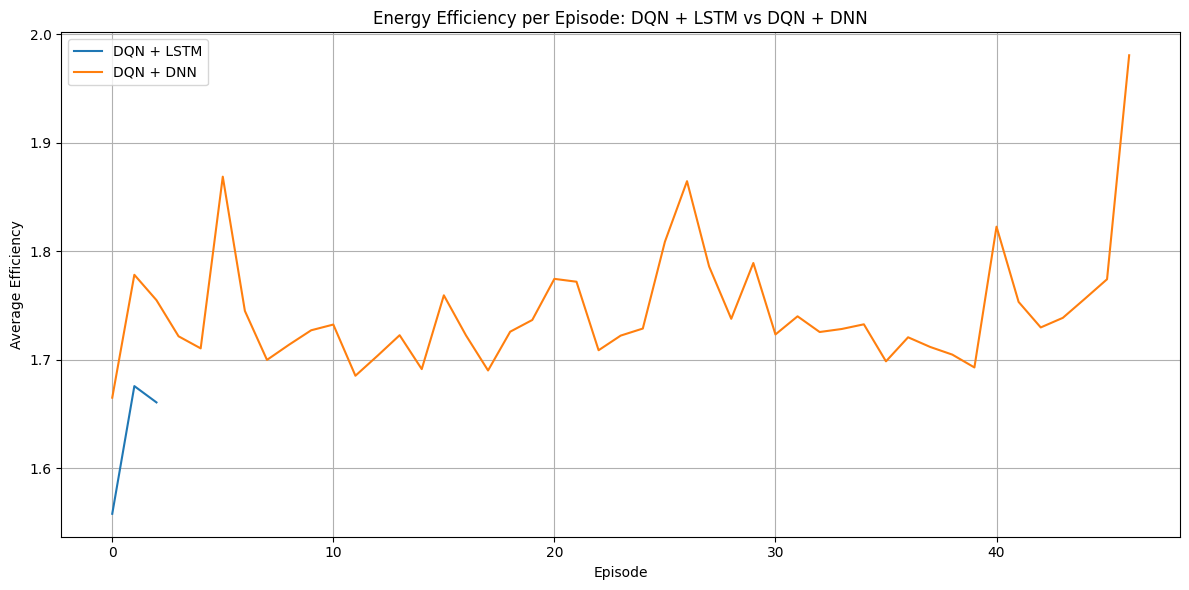

Average Efficiency (LSTM): 1.6315
Average Efficiency (DNN): 1.7443


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
import pandas as pd

df_lstm = pd.read_csv('dueling_lstm_action_log (1).csv')
df_dnn = pd.read_csv('dueling_lstm_action_log (2).csv')

# Check if 'Episode' column exists. If not, infer it by grouping every N steps
# Assuming 400 steps per episode (adjust if you know the exact value)
steps_per_episode = 400
df_lstm['Episode'] = df_lstm.index // steps_per_episode
df_dnn['Episode'] = df_dnn.index // steps_per_episode

# Compute average Efficiency per episode
eff_lstm = df_lstm.groupby('Episode')['Efficiency'].mean()
eff_dnn = df_dnn.groupby('Episode')['Efficiency'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(eff_lstm.index, eff_lstm.values, label='DQN + LSTM')
plt.plot(eff_dnn.index, eff_dnn.values, label='DQN + DNN')
plt.xlabel('Episode')
plt.ylabel('Average Efficiency')
plt.title('Energy Efficiency per Episode: DQN + LSTM vs DQN + DNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print summary stats
print("Average Efficiency (LSTM):", round(eff_lstm.mean(), 4))
print("Average Efficiency (DNN):", round(eff_dnn.mean(), 4))


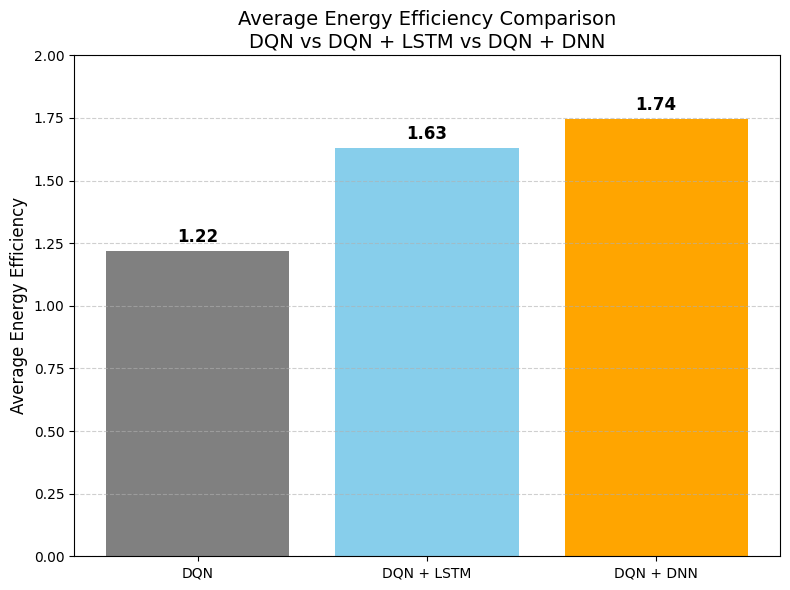

In [ ]:
import matplotlib.pyplot as plt

# Given average efficiencies
eff_dqn = 1.2197  # Back-calculated base DQN
eff_lstm = 1.6315
eff_dnn = 1.7443

# Labels and values
labels = ['DQN', 'DQN + LSTM', 'DQN + DNN']
efficiencies = [eff_dqn, eff_lstm, eff_dnn]
colors = ['gray', 'skyblue', 'orange']

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, efficiencies, color=colors)

# Annotate bars with values and improvements
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and axis
plt.title('Average Energy Efficiency Comparison\nDQN vs DQN + LSTM vs DQN + DNN', fontsize=14)
plt.ylabel('Average Energy Efficiency', fontsize=12)
plt.ylim(0, 2)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
